# Evaluation Project 9: Insurance Claims- Fraud Detection

### Problem Statement: 

    Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,  roc_auc_score,roc_curve,plot_roc_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/mohittomar2008/Insurance-Claims--Fraud-Detection/main/Automobile_insurance_fraud.csv")

In [5]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.head(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  

[2 rows x 40 columns]

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

There are in total 1000 rows and 40 columns available. Among which "Fraud_reported" is our target variable. Rest of the variables are independent and significant variables.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Three data types has been included in the dataset - Object, Float and Integer. Both categorical and numerical variables do exsist in the dataset.

In [7]:
df.isnull().sum().T

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
## Since there are no null values available in the dataset. Only one variable "_c39" have no filled value which is completly insignificant. We will be dropping it here. 
df.drop('_c39',axis=1,inplace=True)
print("Now dataset is good to go! No missing values exsist anymore.")

Now dataset is good to go! No missing values exsist anymore.


In [9]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

Observation: 

        1. All variables hold equal number of rows. 
        2. Standard deviation of almost all variables are quite high, implying data is not normally distributed. Some amount of skewness does exsist in the set. We will figure it out later. 
        3. There is a significant difference in mean and median both --> Data is skewed.

# Univariate and Bivariate Data Analysis: 

In [10]:
catg=[col for col in df.columns if df[col].dtypes=='object']
cont=[col for col in df.columns if df[col].dtypes!='object']

In [11]:
print(f'Number of Categorical features in the dataset: {len(catg)}')
print(f'Number of Continuous features in the dataset: {len(cont)}')

Number of Categorical features in the dataset: 21
Number of Continuous features in the dataset: 18


N    753
Y    247
Name: fraud_reported, dtype: int64


Text(0, 0.5, 'Percentage')

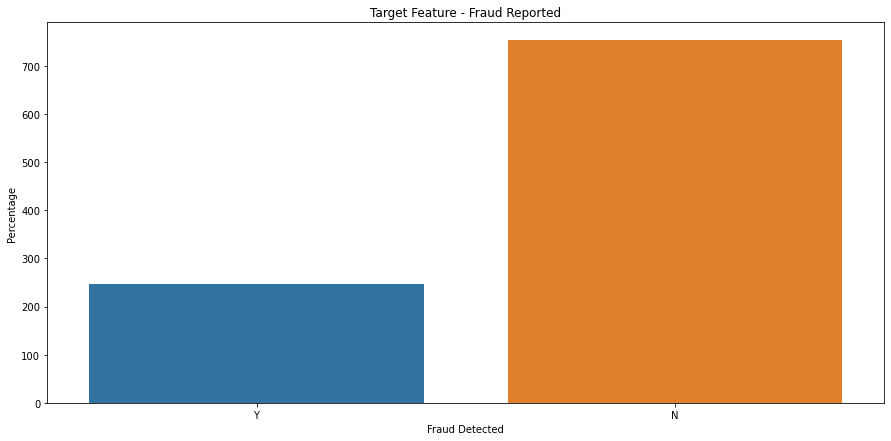

In [12]:
print(df['fraud_reported'].value_counts(dropna=False)) 
plt.figure(figsize=(15,7))
plt.title("Target Feature - Fraud Reported")
sns.countplot(df['fraud_reported'])
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')

It is not the case that fraud reports are high. Comparitevly, fruads reported are very less in numbers. However, significant number of frauds has not been reported. 

<AxesSubplot:xlabel='age', ylabel='Density'>

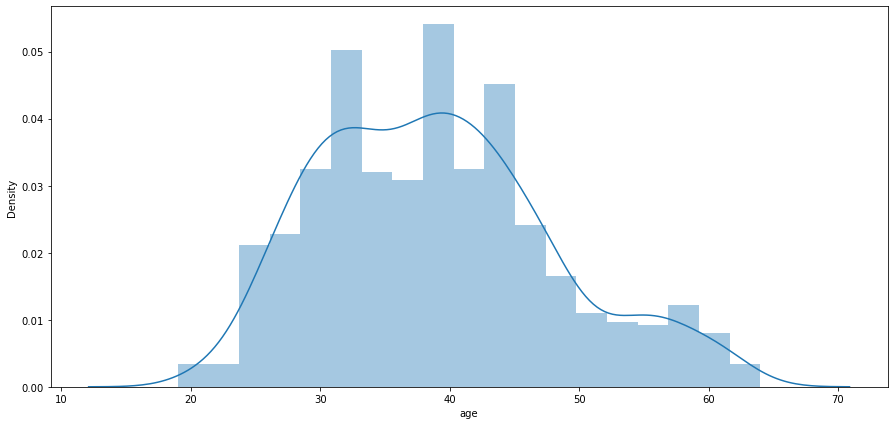

In [14]:
plt.figure(figsize=(15,7))
sns.distplot(df['age'])

Text(0, 0.5, 'Fraud Reported')

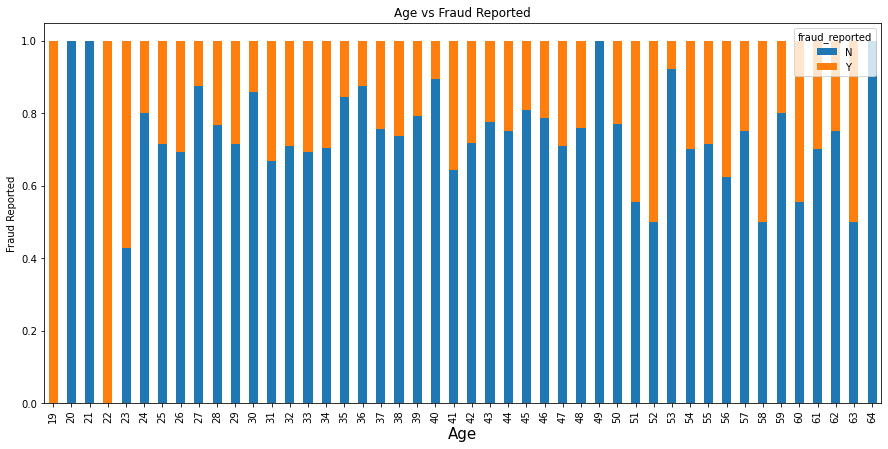

In [15]:
plt.rcParams['figure.figsize'] = [15, 7]
table=pd.crosstab(df['age'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Age vs Fraud Reported')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Fraud Reported')

    No frauds reports are done in the age group of 20,21,49, and 64. 
    Highest fraud reports are done by the people of age 19,22, and 52.

In [16]:
print(df['policy_number'].nunique())

1000


Policy number doesn't hold that significance in defining the fraud. 

In [17]:
print(df['policy_bind_date'].nunique())
print(df['policy_bind_date'].value_counts(dropna=False))

951
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64


['OH' 'IN' 'IL']


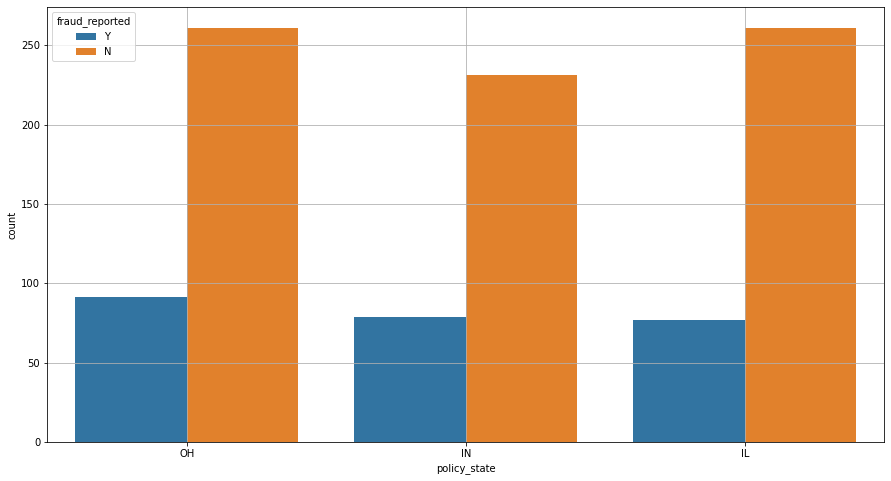

In [18]:
print(df['policy_state'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['policy_state'],hue=df['fraud_reported'])
plt.grid()

Text(0, 0.5, 'Fraud Reported')

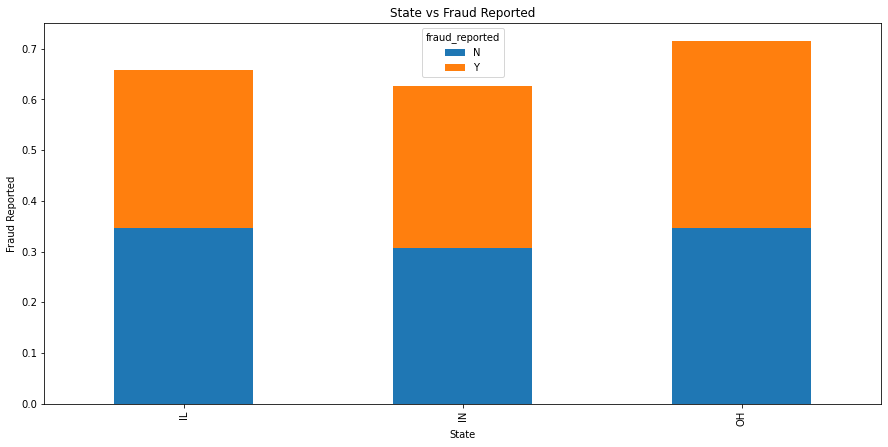

In [19]:
plt.rcParams['figure.figsize']=[15,7]
table=pd.crosstab(df['policy_state'],df['fraud_reported'])
table.div(table.sum(0),axis=1).plot(kind='bar',stacked=True)
plt.title('State vs Fraud Reported')
plt.xlabel('State')
plt.ylabel('Fraud Reported')

['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']


<AxesSubplot:xlabel='incident_state', ylabel='count'>

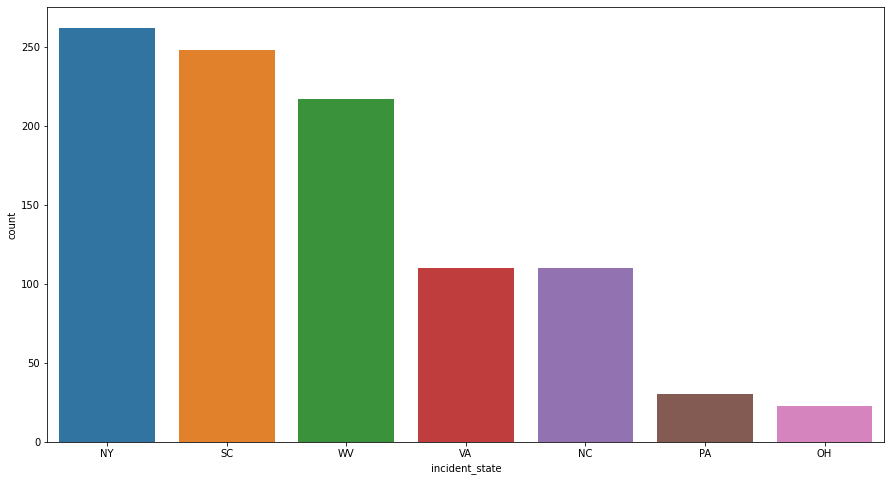

In [20]:
print(df['incident_state'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['incident_state'],order=df['incident_state'].value_counts().index)

['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


<AxesSubplot:xlabel='incident_type', ylabel='count'>

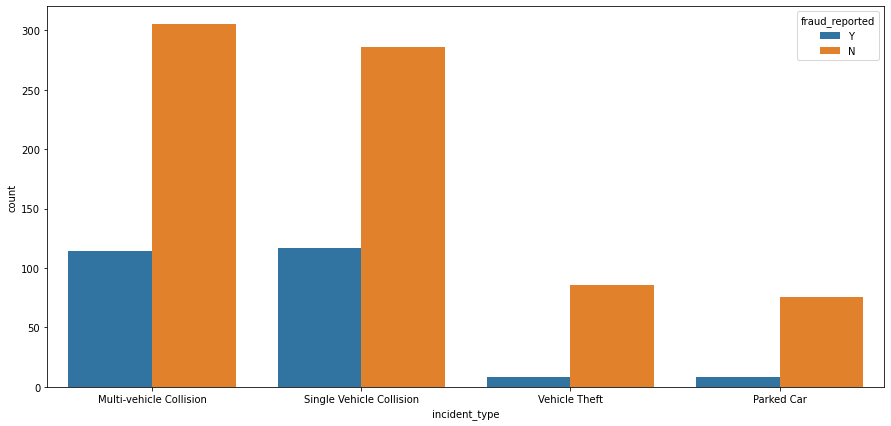

In [21]:
print(df['incident_type'].unique())
plt.figure(figsize=[15,7])
sns.countplot(df['incident_type'], order=df['incident_type'].value_counts().index,hue=df['fraud_reported'])

Text(0, 0.5, 'Percentage ')

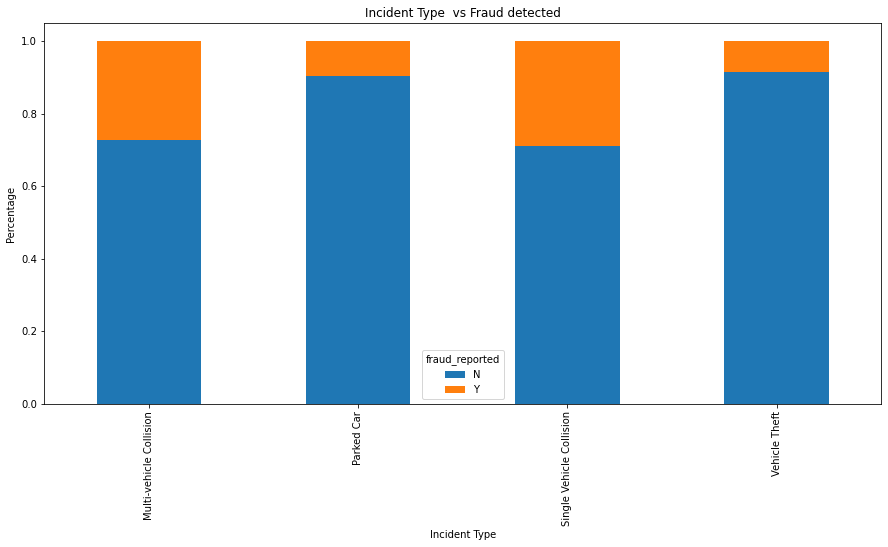

In [22]:
table=pd.crosstab(df['incident_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Incident Type  vs Fraud detected")
plt.xlabel('Incident Type')
plt.ylabel('Percentage ')

Maximum times frauds were reported in the case of vechile theft, parked car, and minimum in multi-vechile collision.

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64


Text(0, 0.5, 'Percentage ')

<Figure size 1080x504 with 0 Axes>

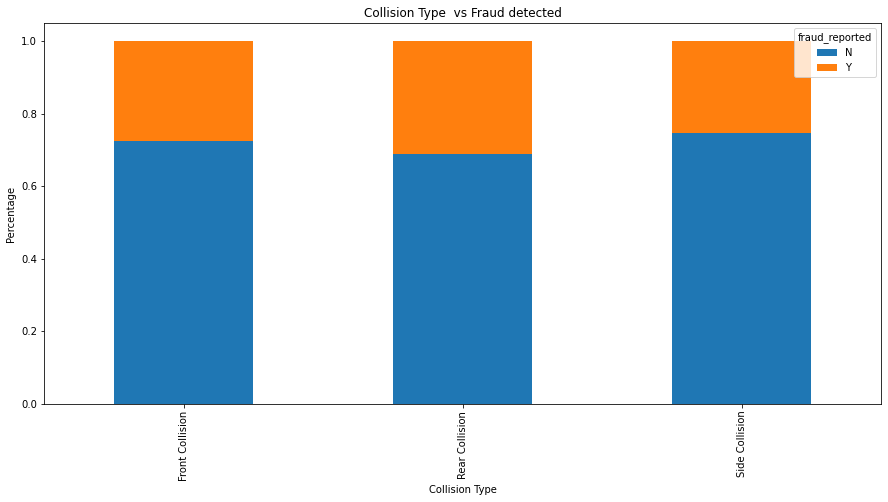

In [25]:
print(df['collision_type'].value_counts(dropna=False))
plt.figure(figsize=[15,7])
table=pd.crosstab(df['collision_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Collision Type  vs Fraud detected")
plt.xlabel('Collision Type')
plt.ylabel('Percentage ')

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Minor Damage      0.354
Total Loss        0.280
Major Damage      0.276
Trivial Damage    0.090
Name: incident_severity, dtype: float64


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

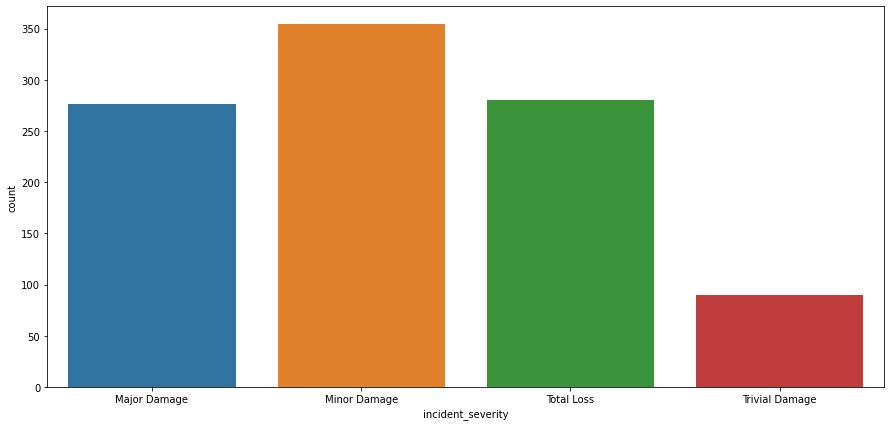

In [26]:
print(df['incident_severity'].unique())
print(df['incident_severity'].value_counts(normalize=True))
plt.figure(figsize=[15,7])
sns.countplot(df['incident_severity'])

Majority of the times minor damage is recorded for the reports. Trivial damage case is very low.

['Police' 'None' 'Fire' 'Other' 'Ambulance']


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

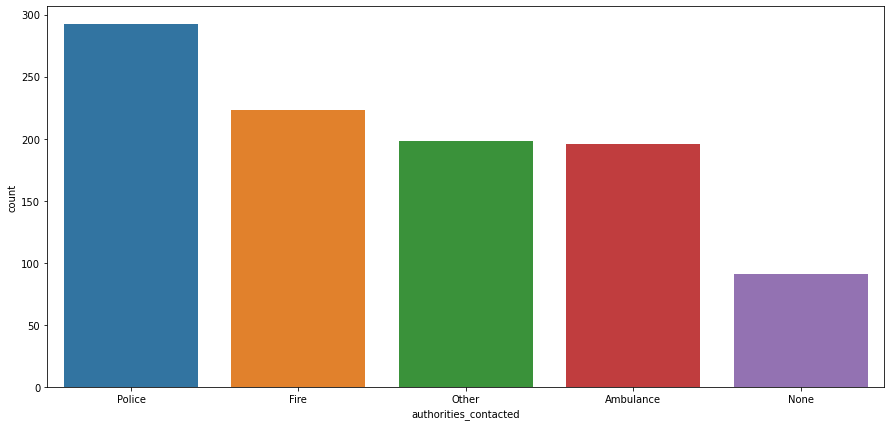

In [27]:
print(df['authorities_contacted'].unique())
plt.figure(figsize=[15,7])
sns.countplot(df['authorities_contacted'], order=df['authorities_contacted'].value_counts().index)

Police is contacted majority of the times if there is a incident. Then there is a fire.

[1 3 4 2]


<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

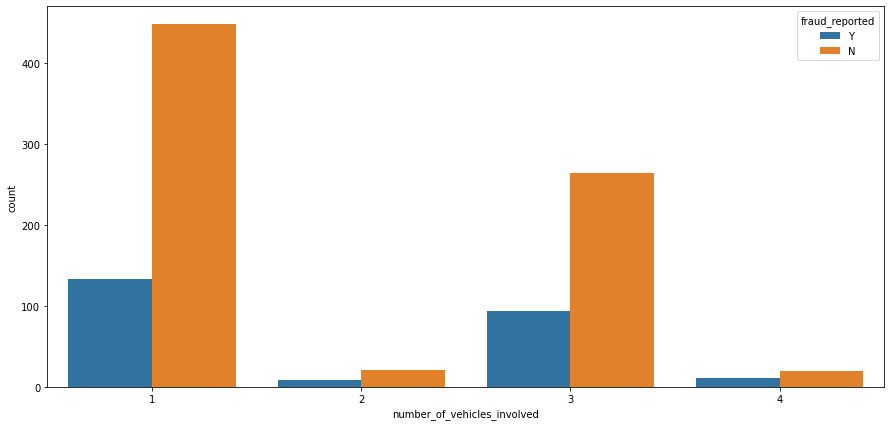

In [28]:
print(df['number_of_vehicles_involved'].unique())
plt.figure(figsize=[15,7])
sns.countplot(df['number_of_vehicles_involved'], hue=df['fraud_reported'])

['YES' nan 'NO']


<AxesSubplot:xlabel='property_damage', ylabel='count'>

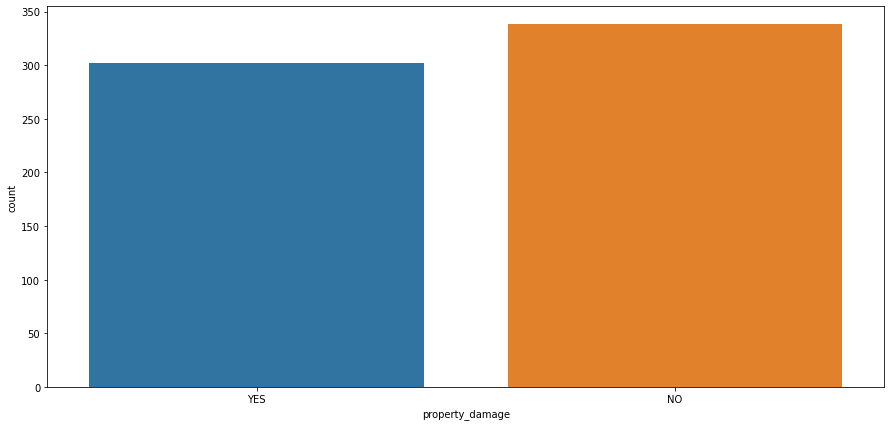

In [29]:
df['property_damage'].replace('?',np.nan, inplace=True)
print(df['property_damage'].unique())
plt.figure(figsize=[15,7])
sns.countplot(df['property_damage'])

<AxesSubplot:xlabel='property_damage', ylabel='count'>

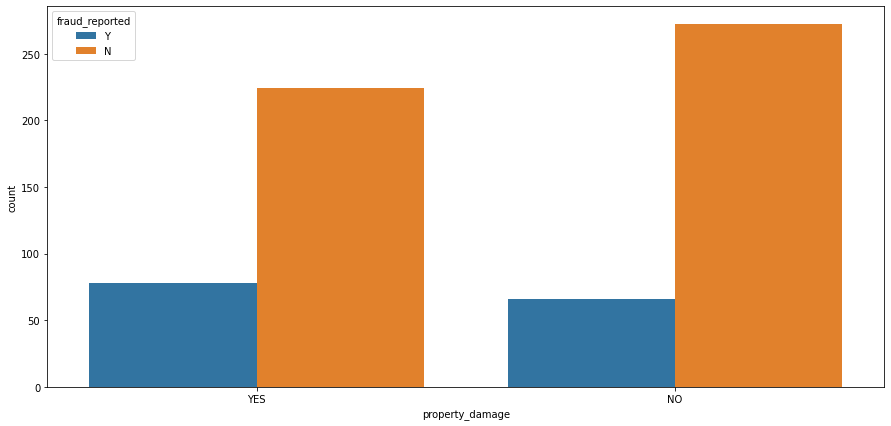

In [30]:
plt.figure(figsize=[15,7])
sns.countplot(df['property_damage'],hue=df['fraud_reported'])

property_damage  fraud_reported
NO               N                 272
                 Y                  66
YES              N                 224
                 Y                  78
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

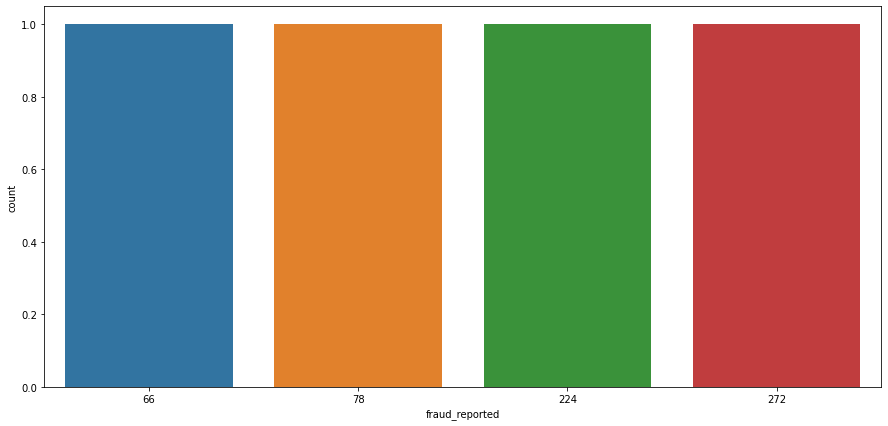

In [31]:
print(df.groupby('property_damage')['fraud_reported'].value_counts())
plt.figure(figsize=[15,7])
sns.countplot(df.groupby('property_damage')['fraud_reported'].value_counts())

[1 0 2]


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

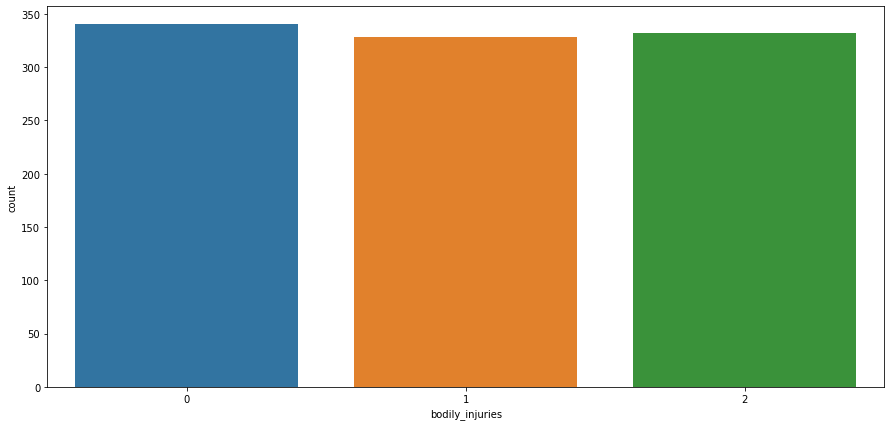

In [33]:
print(df['bodily_injuries'].unique())
plt.figure(figsize=[15,7])
sns.countplot(df['bodily_injuries'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

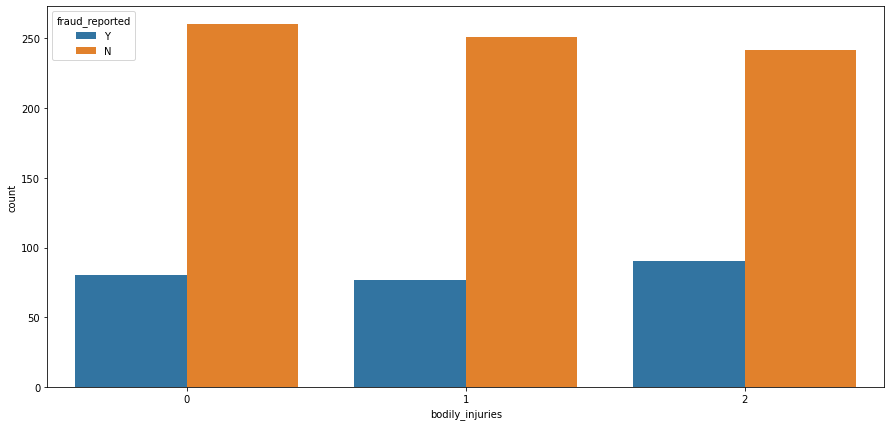

In [34]:
plt.figure(figsize=[15,7])
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])

['YES' nan 'NO']


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

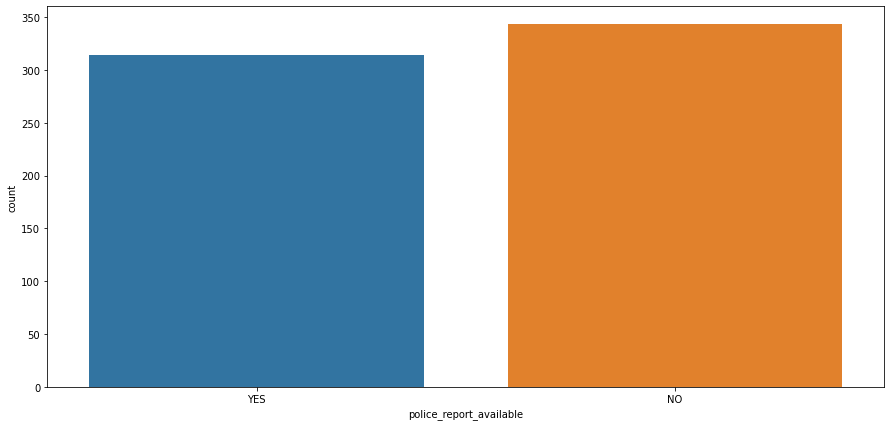

In [35]:
print(df['police_report_available'].unique())
plt.figure(figsize=[15,7])
sns.countplot(df['police_report_available'])

['92x' 'E400' 'RAM' 'Tahoe' 'RSX' '95' 'Pathfinder' 'A5' 'Camry' 'F150'
 'A3' 'Highlander' 'Neon' 'MDX' 'Maxima' 'Legacy' 'TL' 'Impreza'
 'Forrestor' 'Escape' 'Corolla' '3 Series' 'C300' 'Wrangler' 'M5' 'X5'
 'Civic' 'Passat' 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion'
 'Jetta' 'ML350' 'Ultima' 'Grand Cherokee']


<AxesSubplot:xlabel='auto_model', ylabel='count'>

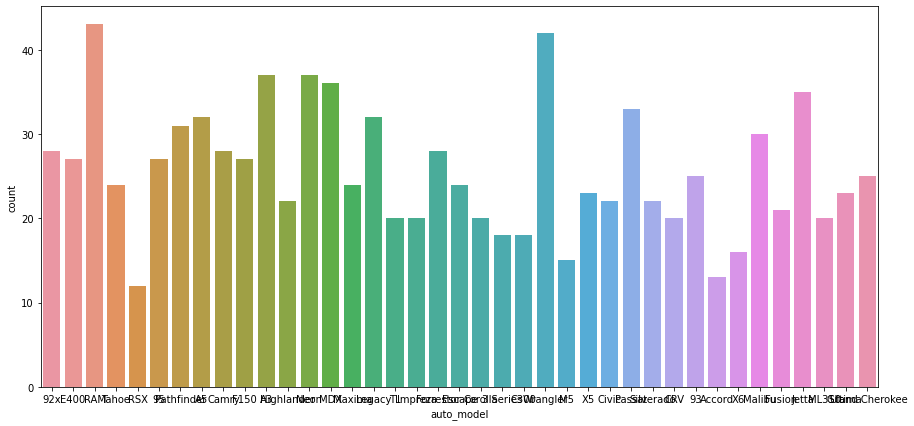

In [36]:
print(df['auto_model'].unique())
plt.figure(figsize=[15,7])
sns.countplot(df['auto_model'])

In [37]:
plt.figure(figsize=[15,7])
table=pd.crosstab(df['auto_model'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Auto Model  vs Fraud Case')

Text(0.5, 1.0, 'Auto Model  vs Fraud Case')

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='auto_year', ylabel='count'>

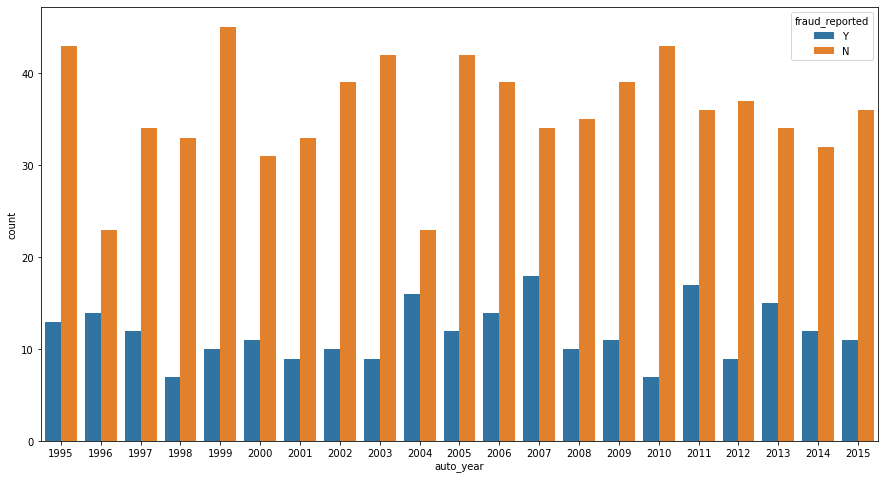

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])

['MALE' 'FEMALE']
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

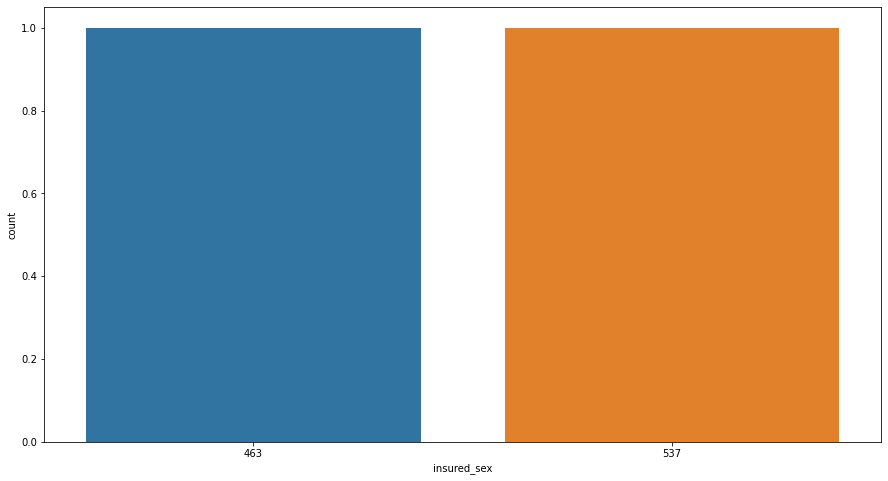

In [41]:
print(df['insured_sex'].unique())
print(df['insured_sex'].value_counts())
plt.figure(figsize=[15,8])
sns.countplot(df['insured_sex'].value_counts())

<AxesSubplot:title={'center':'Frauds Reported v/s Insured Sex'}, xlabel='insured_sex', ylabel='count'>

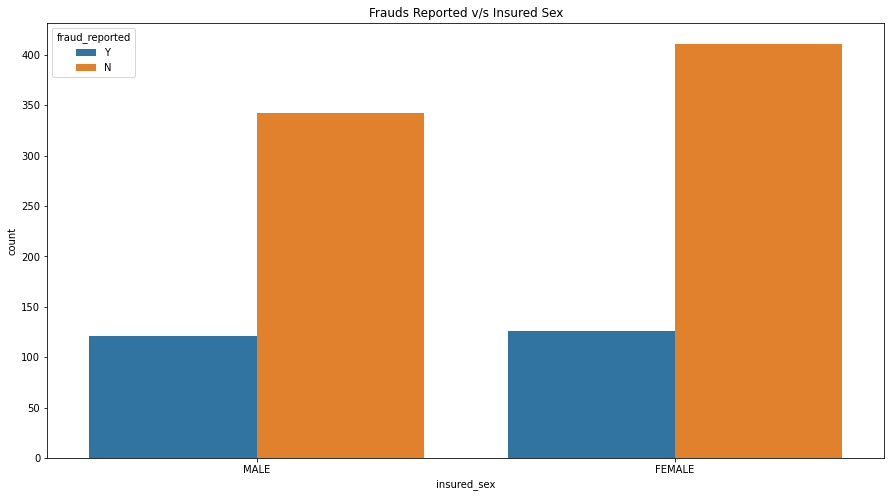

In [42]:
plt.figure(figsize=[15,8])
plt.title('Frauds Reported v/s Insured Sex')
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

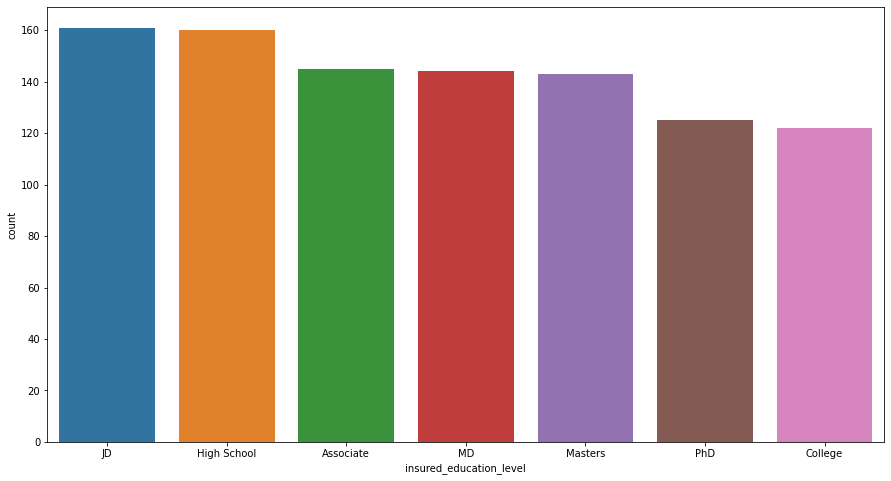

In [43]:
print(df['insured_education_level'].unique())
print(df['insured_education_level'].value_counts())
plt.figure(figsize=[15,8])
sns.countplot(df['insured_education_level'],order=df['insured_education_level'].value_counts().index)

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


<AxesSubplot:xlabel='insured_occupation'>

<Figure size 1080x576 with 0 Axes>

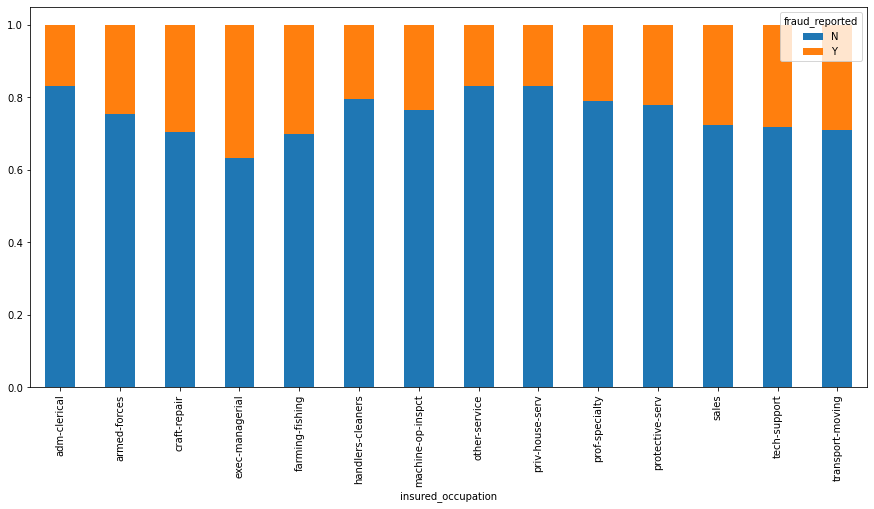

In [44]:
print(df['insured_occupation'].value_counts())
plt.figure(figsize=[15,8])
tab=pd.crosstab(df['insured_occupation'],df['fraud_reported'])
tab.div(tab.sum(1),axis=0).plot(kind='bar',stacked=True)

['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

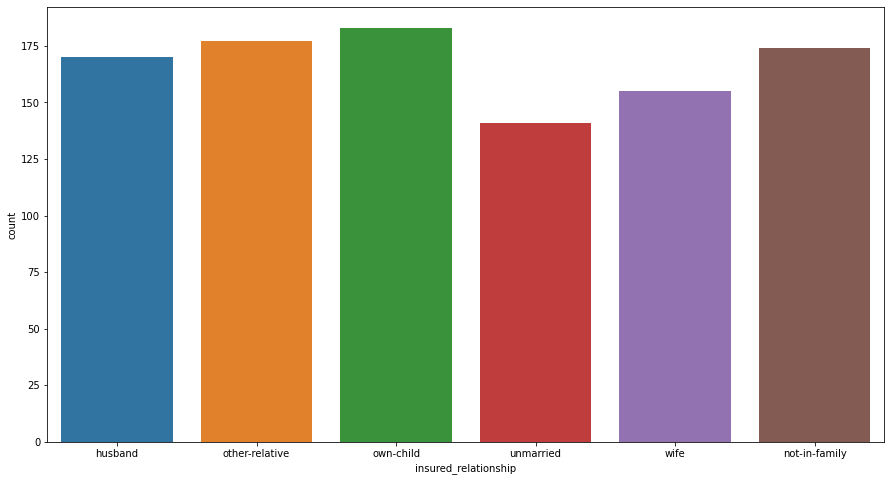

In [45]:
print(df['insured_relationship'].unique())
print(df['insured_relationship'].value_counts())
plt.figure(figsize=[15,8])
sns.countplot(df['insured_relationship'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

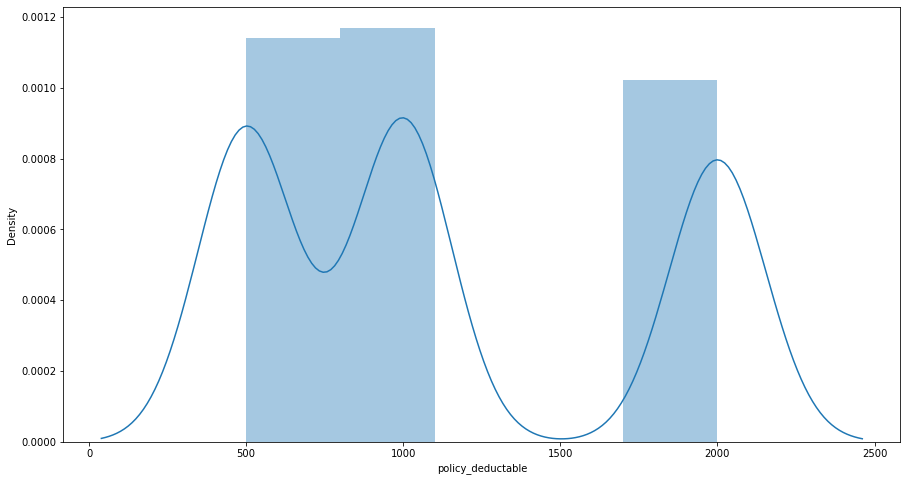

In [46]:
plt.figure(figsize=[15,8])
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

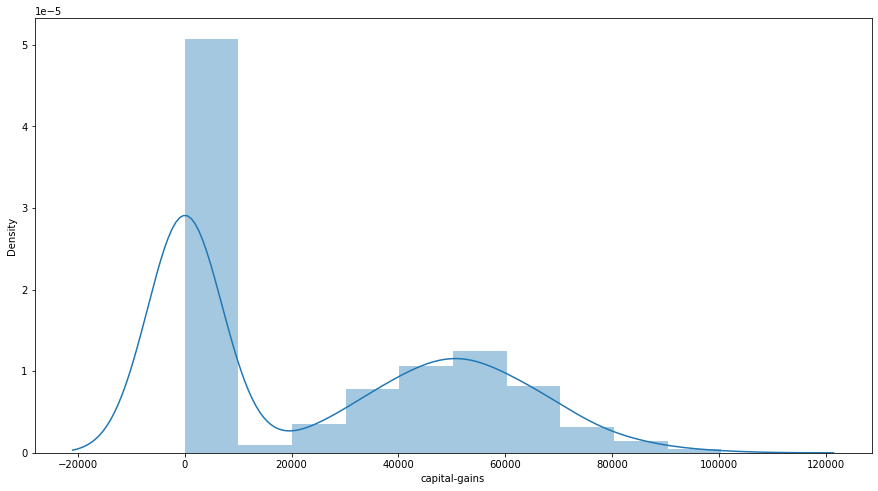

In [47]:
plt.figure(figsize=[15,8])
sns.distplot(df['capital-gains'])

Text(0.5, 0, 'AGE')

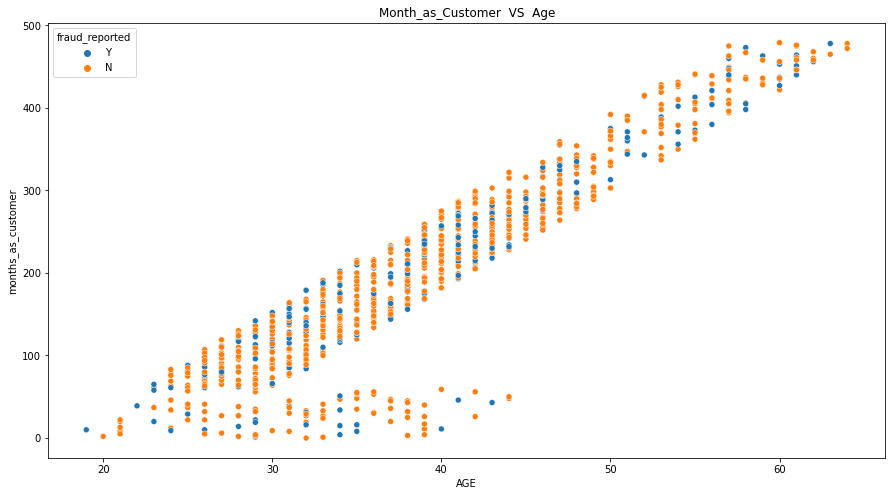

In [48]:
plt.figure(figsize=[15,8])
sns.scatterplot('age','months_as_customer',hue='fraud_reported',data=df)
plt.title('Month_as_Customer  VS  Age')
plt.xlabel('AGE')

Text(0.5, 0, 'policy_deductable')

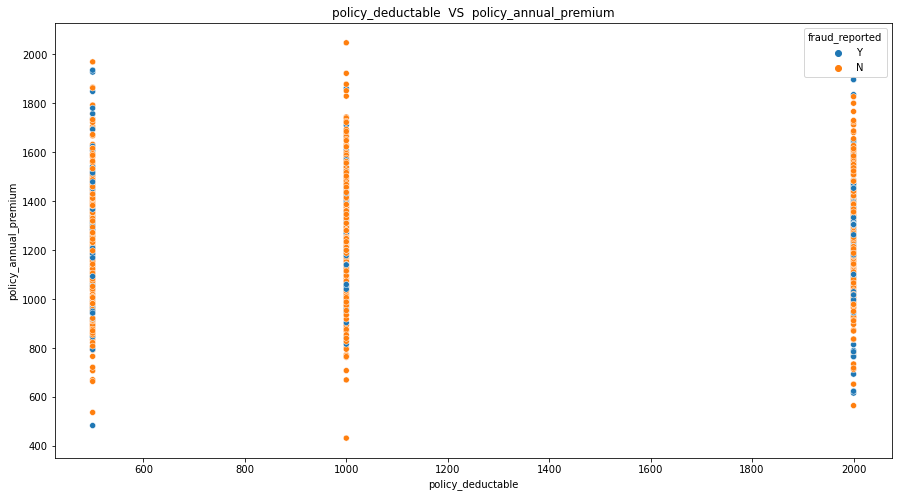

In [49]:
plt.figure(figsize=[15,8])
sns.scatterplot('policy_deductable','policy_annual_premium',hue='fraud_reported',data=df)
plt.title('policy_deductable  VS  policy_annual_premium')
plt.xlabel('policy_deductable')

Text(0.5, 0, 'capital-loss')

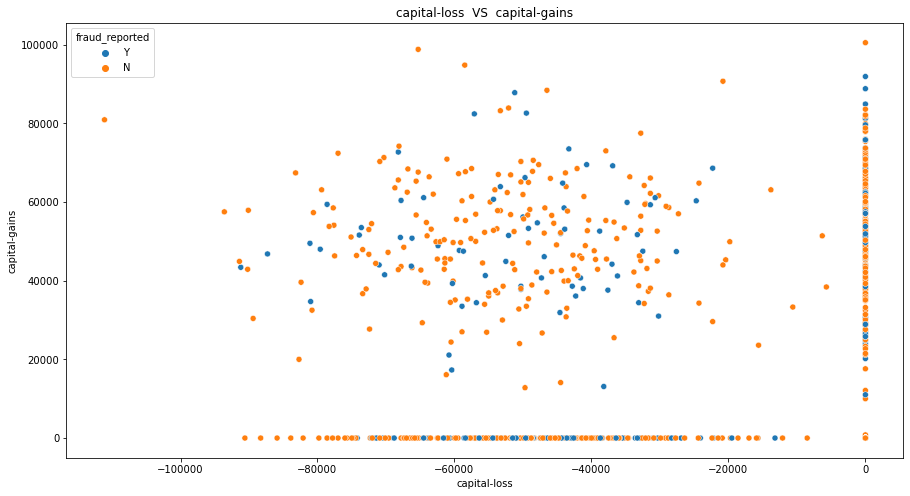

In [50]:
plt.figure(figsize=[15,8])
sns.scatterplot('capital-loss','capital-gains',hue='fraud_reported',data=df)
plt.title('capital-loss  VS  capital-gains')
plt.xlabel('capital-loss')

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

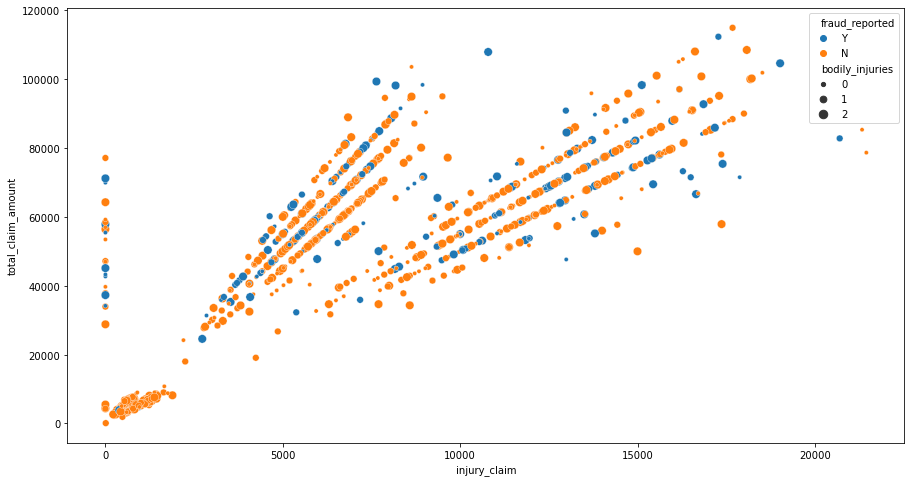

In [51]:
plt.figure(figsize=[15,8])
sns.scatterplot('injury_claim','total_claim_amount',hue='fraud_reported',size='bodily_injuries',data=df)

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

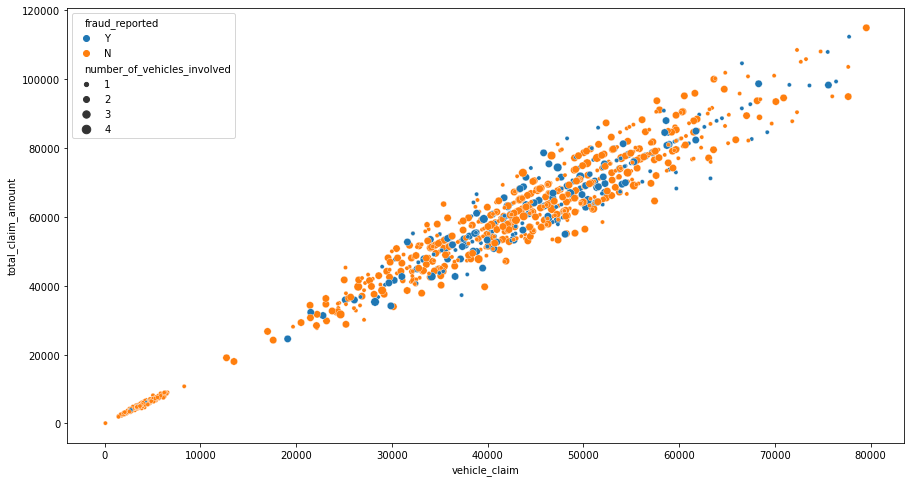

In [52]:
plt.figure(figsize=[15,8])
sns.scatterplot('vehicle_claim','total_claim_amount',hue='fraud_reported',size='number_of_vehicles_involved',data=df)

In [54]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

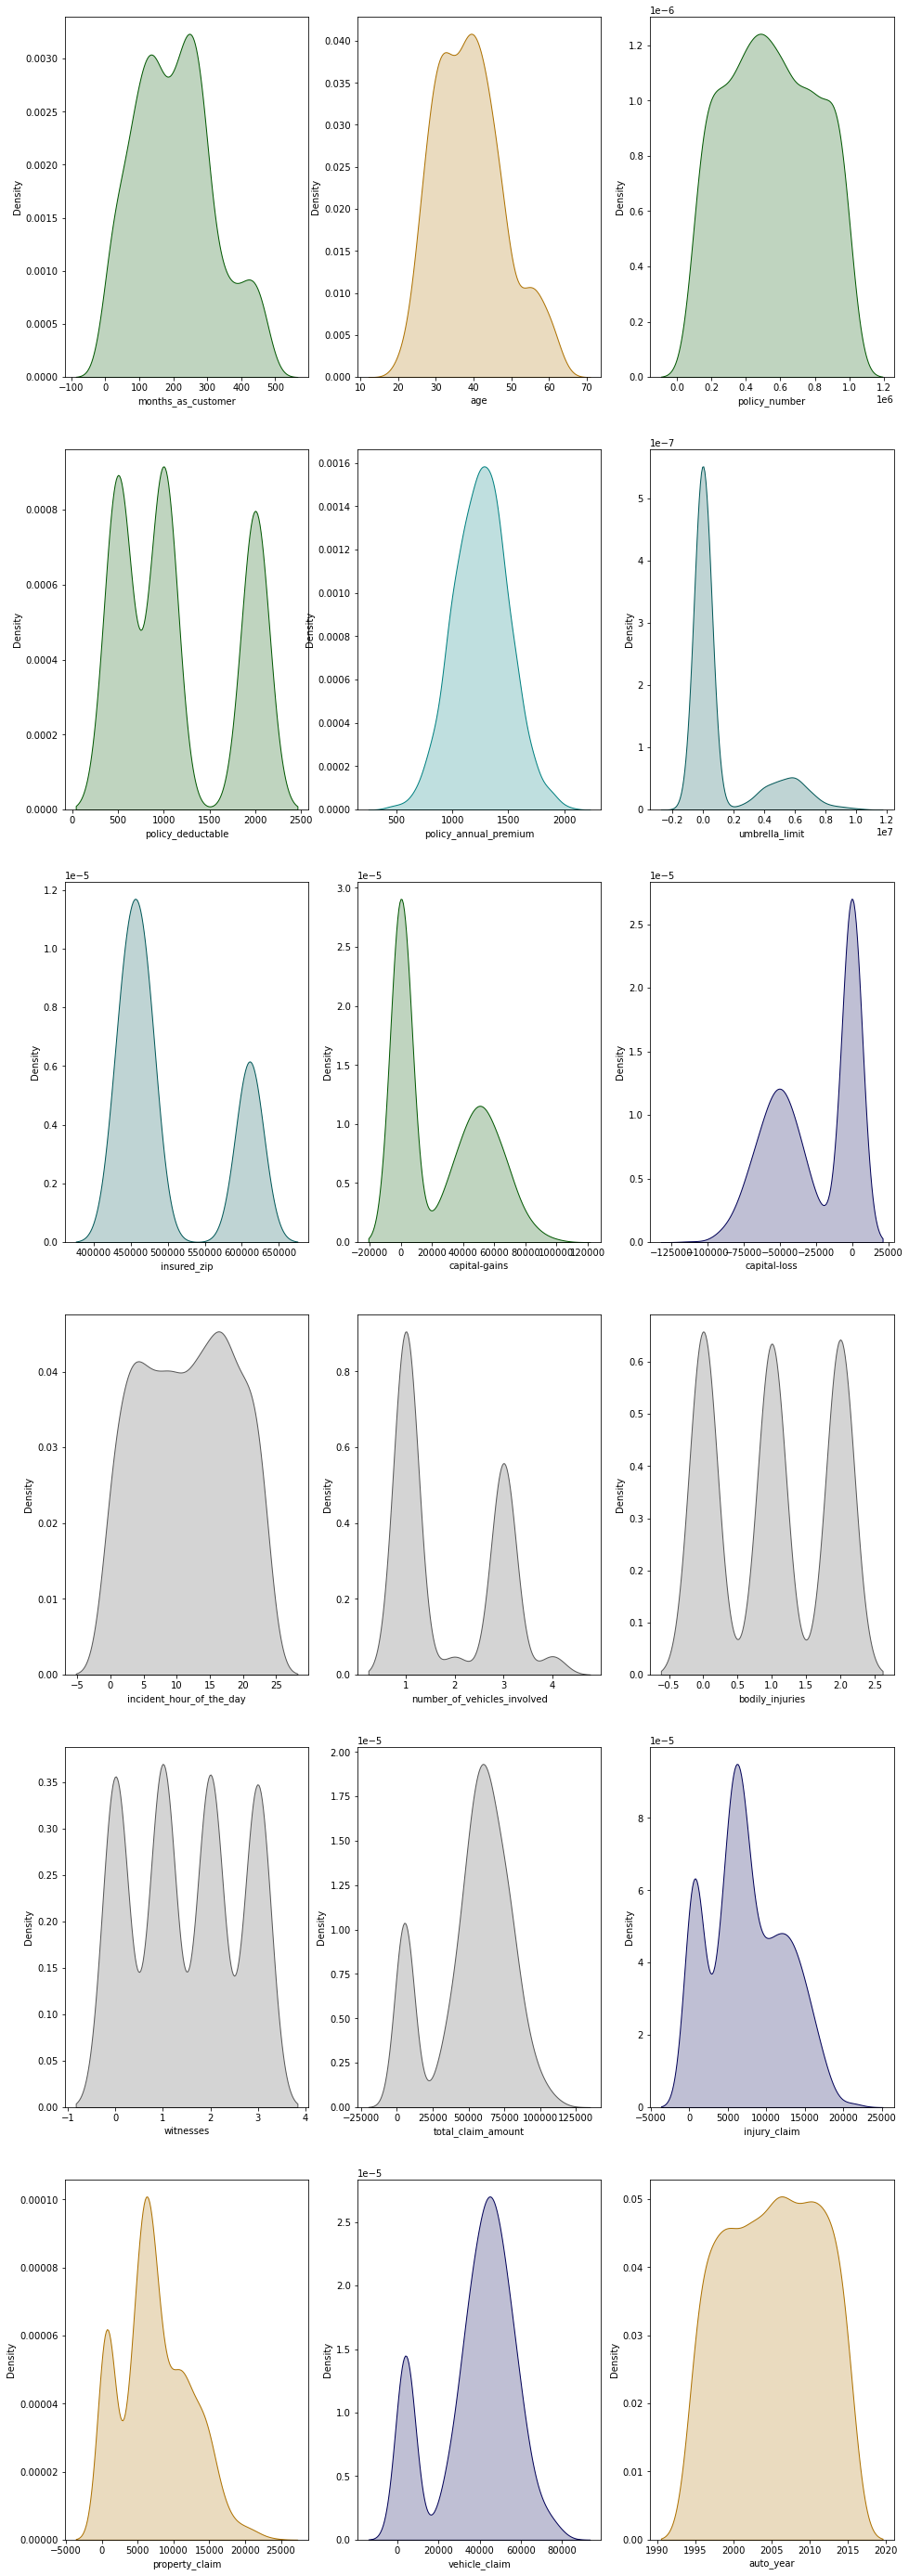

In [55]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)   
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

Some variables don't hold normal distribution and contains skewness on high level. Data is not bell-shaped.

# Correcting the missing values now - 

In [56]:
print(df.isnull().sum()/df.shape[0]*100)

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage             

In [57]:
for i in df.columns:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [58]:
df.isnull().sum().T

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Correlation variables holds within themselves and the target variable: 

In [59]:
le=LabelEncoder()
df['Target']=le.fit_transform(df['fraud_reported'])

                             months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses   

<AxesSubplot:>

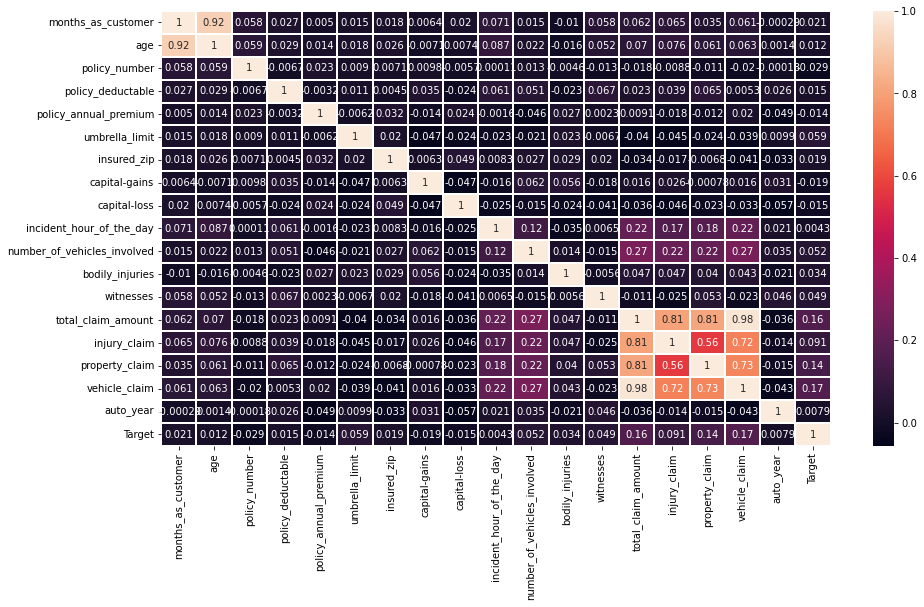

In [61]:
print(df.corr())
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

### Irreleavant columns: We can remove it.
    1. policy_number is not required as it no help in prediction fraud case
    2. policy_bind_date is not required as we have months_as_customer, how old is policy
    3. insured_zip is not required as we have policy_state and many mored details for insured like sex,education,hobby,occupation,relationship

# Cleaning the data: 

In [63]:
df = df.drop(columns = ['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date', 'incident_location',
                        'auto_year'])

In [64]:
df

months_as_customer  age policy_state  policy_deductable  \
0                   328   48           OH               1000   
1                   228   42           IN               2000   
2                   134   29           OH               2000   
3                   256   41           IL               2000   
4                   228   44           IL               1000   
..                  ...  ...          ...                ...   
995                   3   38           OH               1000   
996                 285   41           IL               1000   
997                 130   34           OH                500   
998                 458   62           IL               2000   
999                 456   60           OH               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation insured_hobbies  ...  \
0                        MD       craft-repair        sleeping  ...   
1                        MD  machine-op-inspct         reading  ...   
2                       PhD              sales     board-games  ...   
3                       PhD       armed-forces     board-games  ...   
4                 Associate              sales     board-games  ...   
..                      ...                ...             ...  ...   
995                 Masters       craft-repair       paintball  ...   
996                     PhD     prof-specialty        sleeping  ...   
997                 Masters       armed-forces  bungie-jumping  ...   
998               Associate  handlers-cleaners    base-jumping  ...   
999               Associate              sales        kayaking  ...   

    police_report_available  total_claim_amount  injury_claim property_claim  \
0                       YES               71610          6510          13020   
1                        NO                5070           780            780   
2                        NO               34650          7700           3850   
3                        NO               63400          6340           6340   
4                        NO                6500          1300            650   
..                      ...                 ...           ...            ...   
995                      NO               87200         17440           8720   
996                      NO              108480         18080          18080   
997                     YES               67500          7500           7500   
998                     YES               46980          5220           5220   
999                      NO                5060           460            920   

    vehicle_claim   auto_make auto_model fraud_reported Target  Vehicle_Age  
0           52080        Saab        92x              Y      1           11  
1            3510    Mercedes       E400              Y      1            8  
2           23100       Dodge        RAM              N      0            8  
3           50720   Chevrolet      Tahoe              Y      1            1  
4            4550      Accura        RSX              N      0            6  
..            ...         ...        ...            ...    ...          ...  
995         61040       Honda     Accord              N      0            9  
996         72320  Volkswagen     Passat              N      0            0  
997         52500      

In [66]:
df=df.drop('incident_hour_of_the_day',axis=1)

In [67]:
df=df.drop('fraud_reported', axis=1)

In [68]:
df.head(5)

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies  ... police_report_available  \
0       craft-repair        sleeping  ...                     YES   
1  machine-op-inspct         reading  ...                      NO   
2              sales     board-games  ...                      NO   
3       armed-forces     board-games  ...                      NO   
4              sales     board-games  ...                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model Target Vehicle_Age  incident_period_of_the_day  
0        92x      1          11                       night  
1       E400      1           8                     Morning  
2        RAM      0           8                     Morning  
3      Tahoe      1           1                       night  
4        RSX      0           6                     evening  

[5 rows x 33 columns]

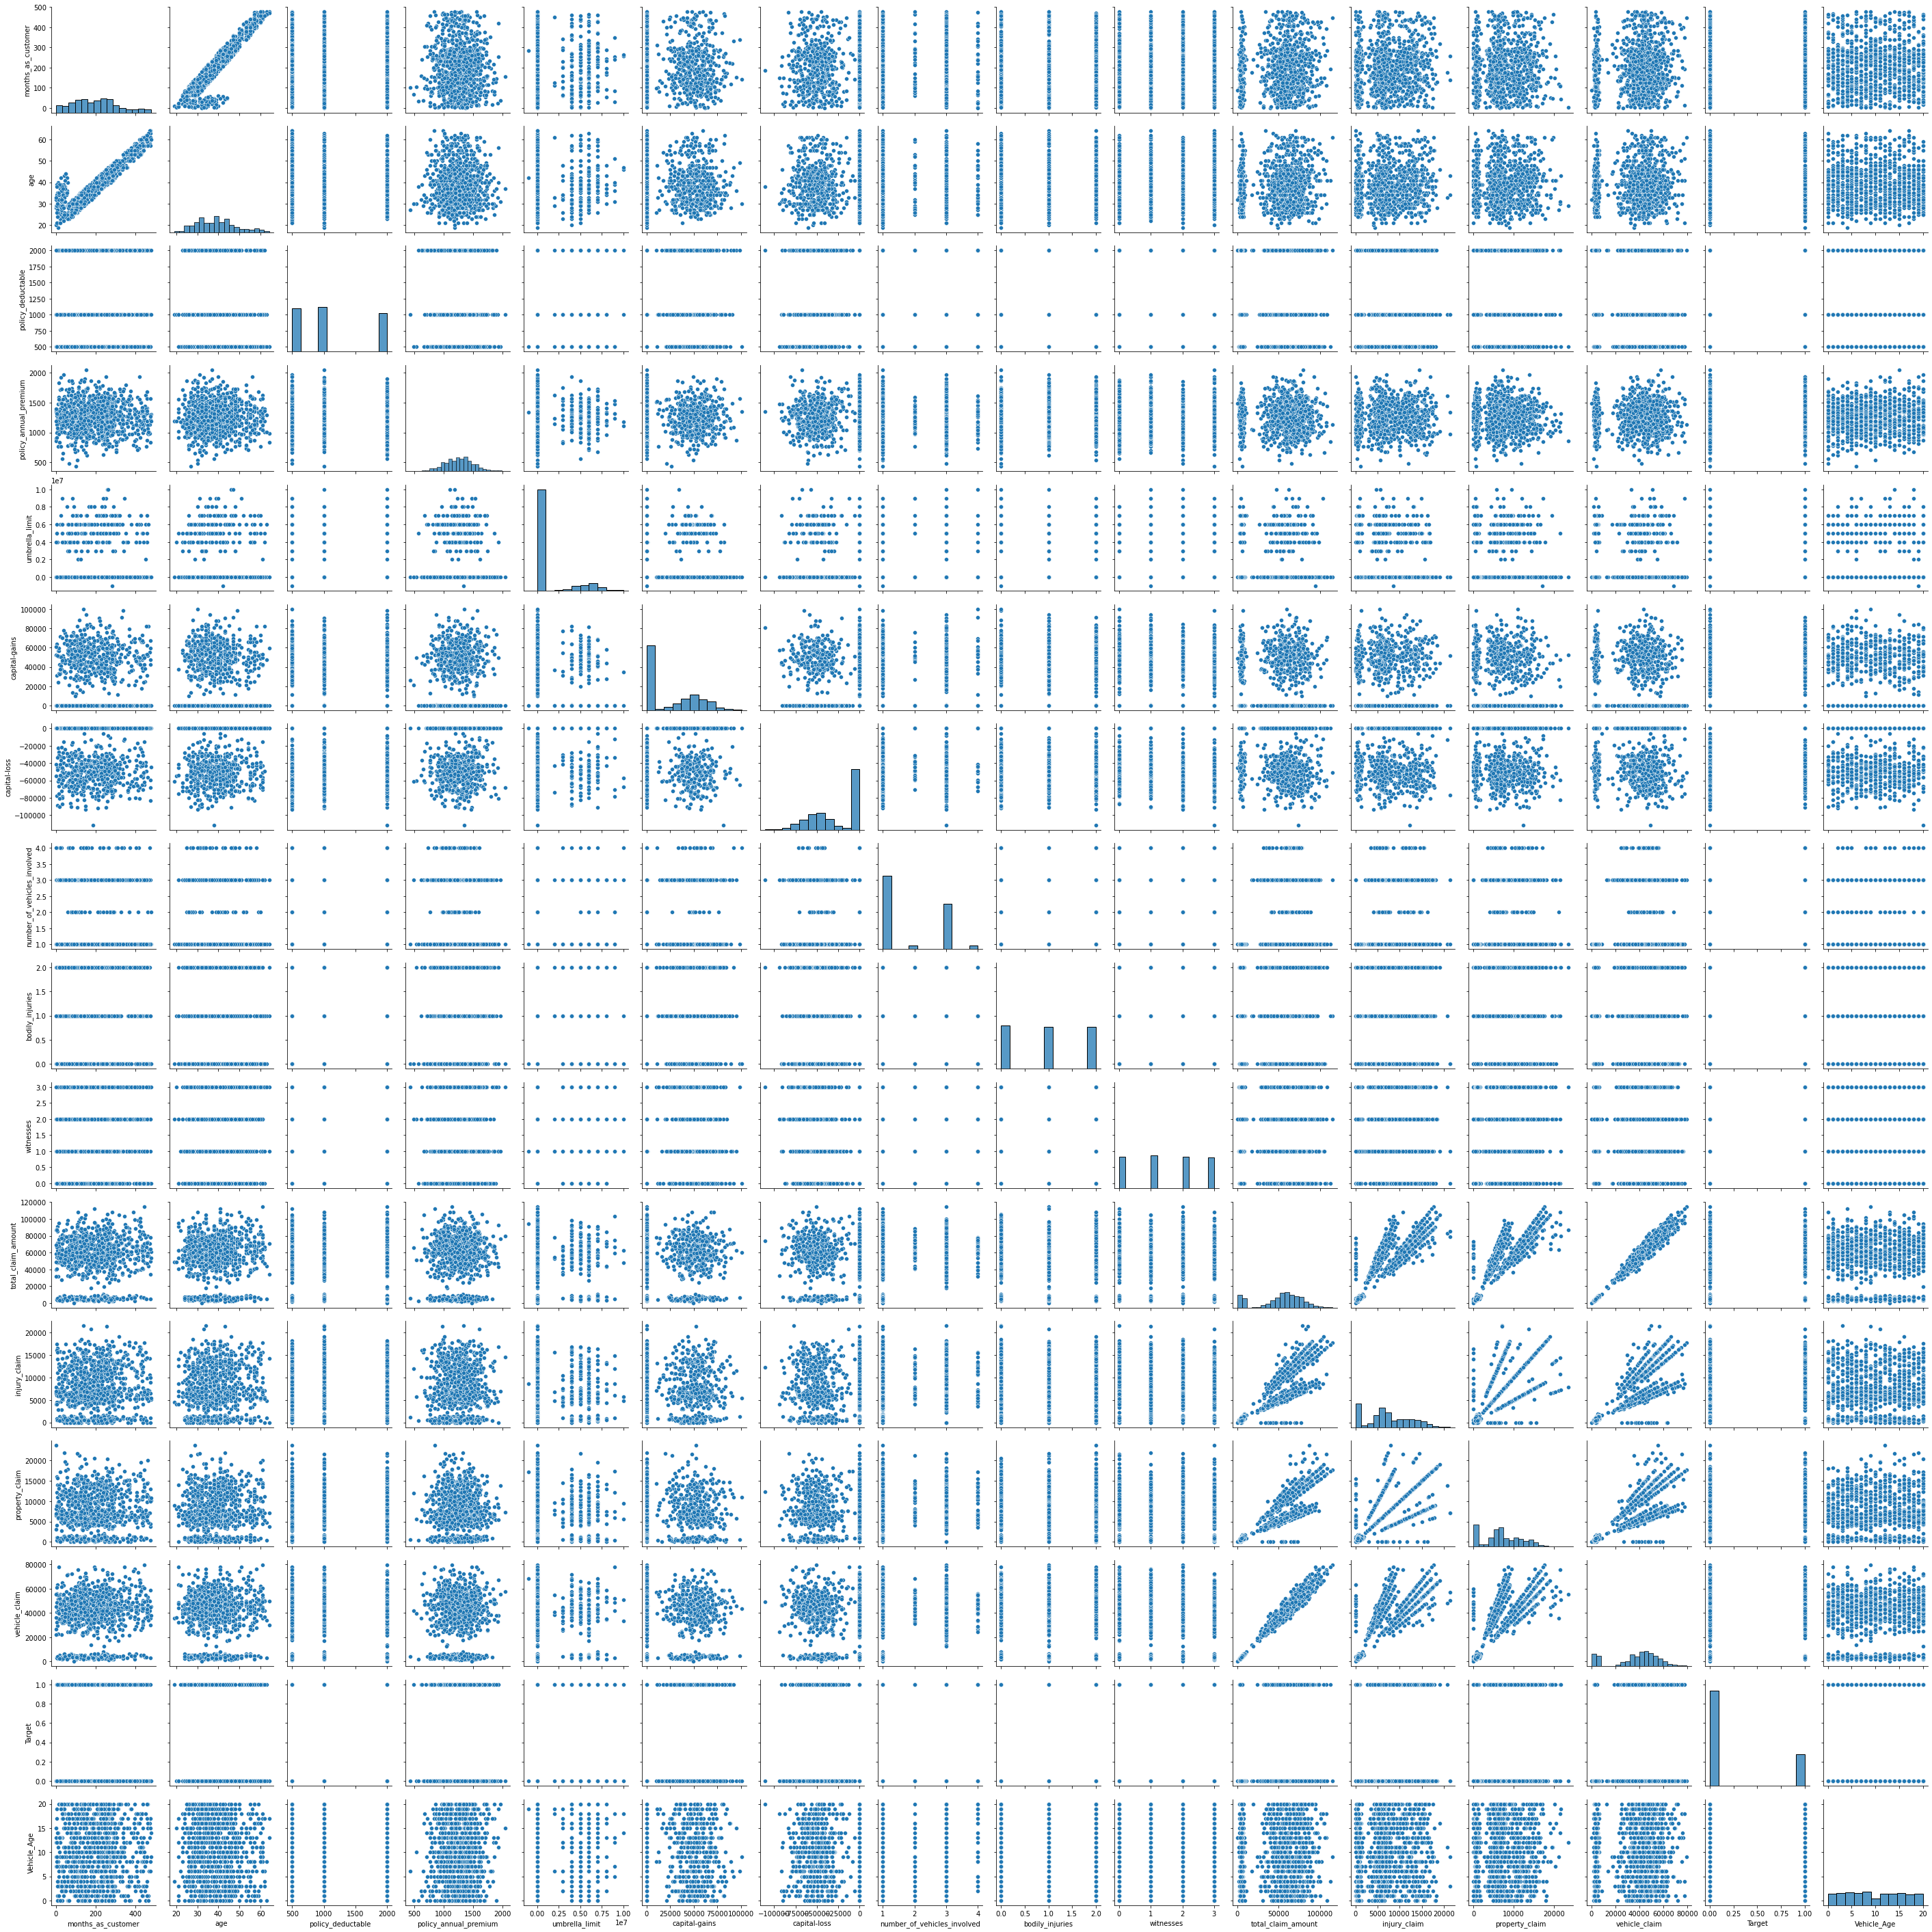

In [69]:
sns.pairplot(df)

In [70]:
df['incident_period_of_the_day']=df['incident_period_of_the_day'].astype(object)
df['umbrella_limit']=df['umbrella_limit'].astype(object)

# Splitting the dependent and independent variables: 

In [71]:
X=df.drop('Target',axis=1)
Y=df['Target']

In [72]:
print(X.shape ,Y.shape)

(1000, 32) (1000,)


In [73]:
catg=[col for col in X.columns if X[col].dtypes=='object']
cont=[col for col in X.columns if X[col].dtypes!='object']

In [75]:
print(len(catg) + len(cont))

32


# Evaluvuating the continous variables first: 

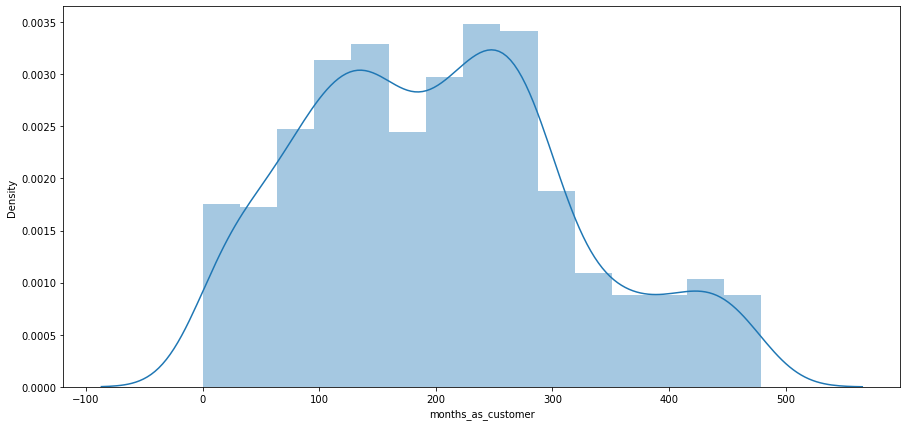

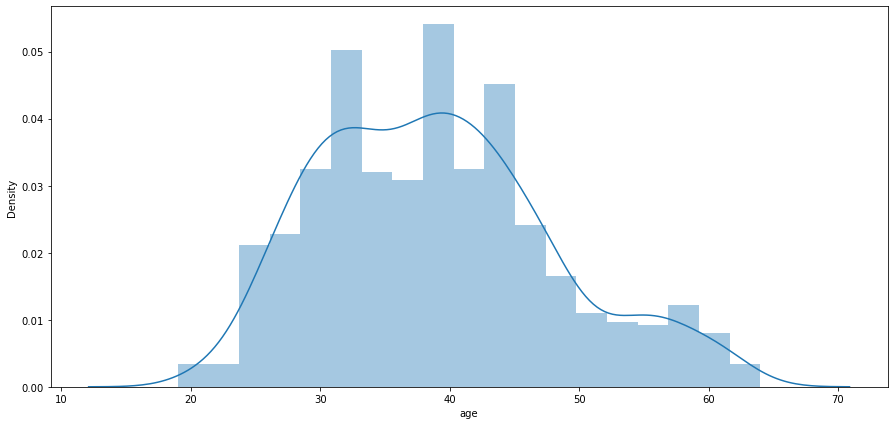

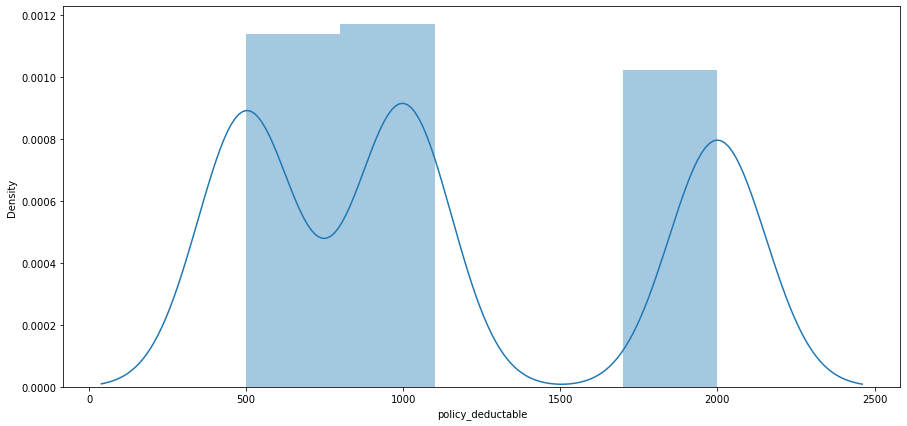

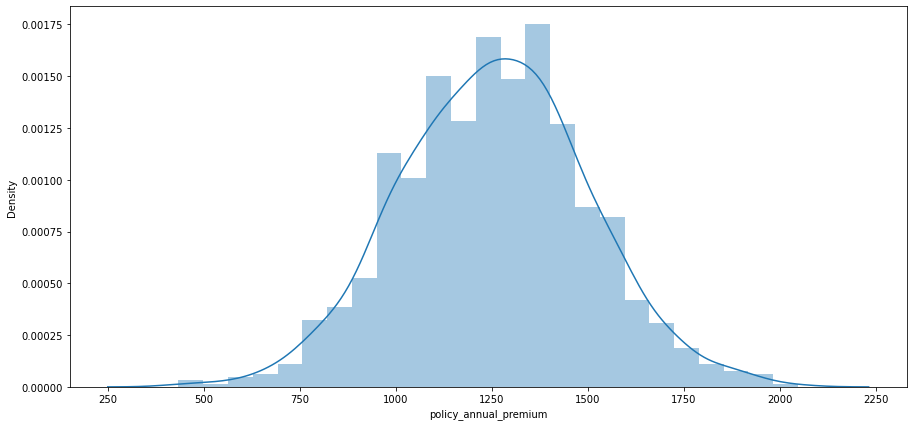

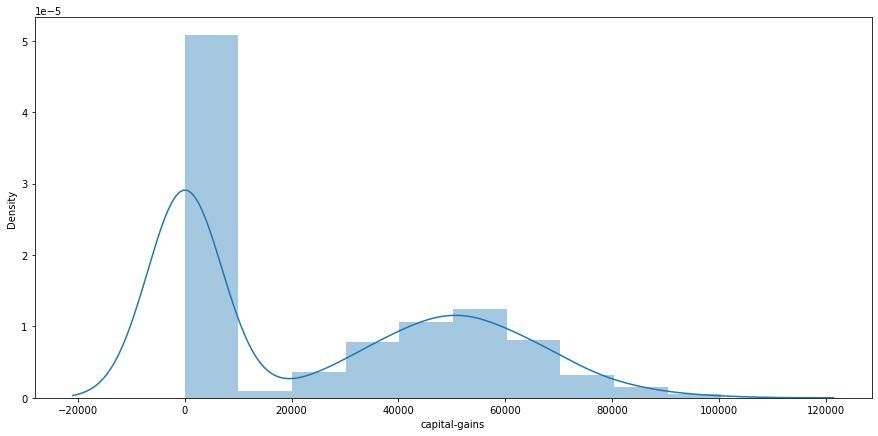

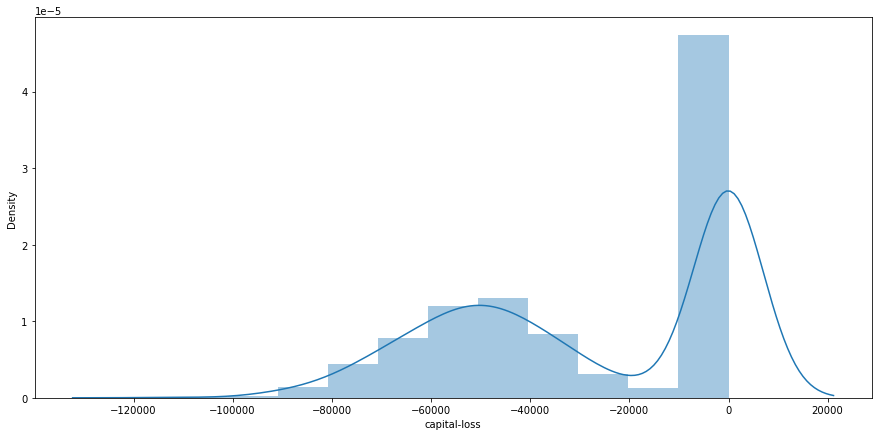

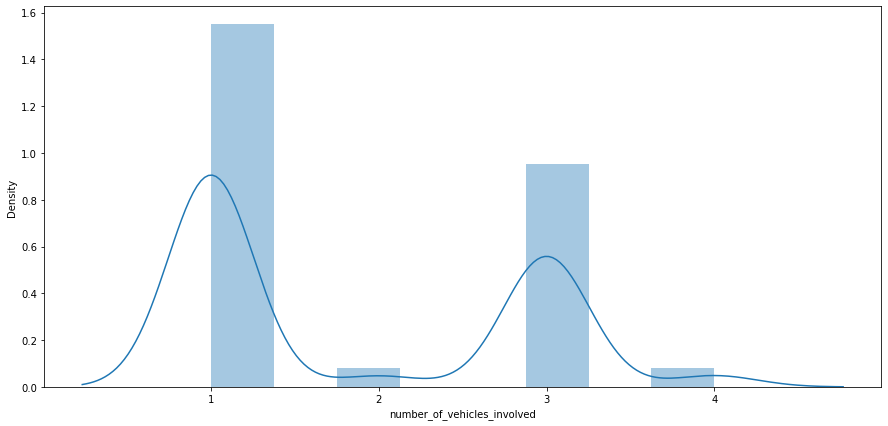

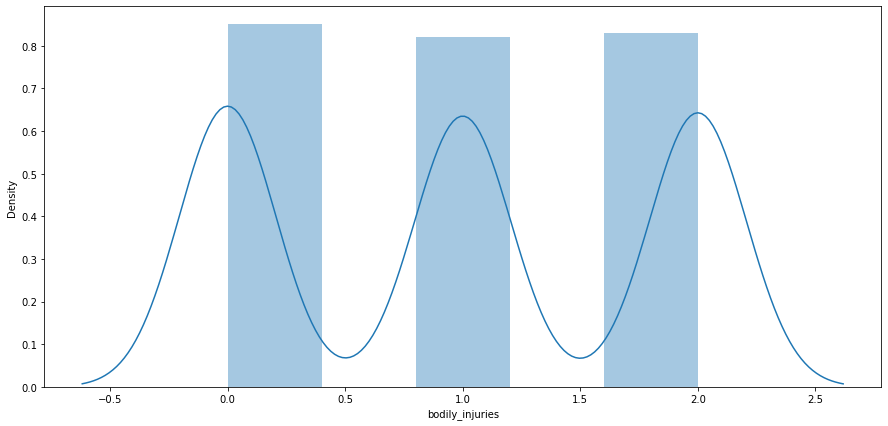

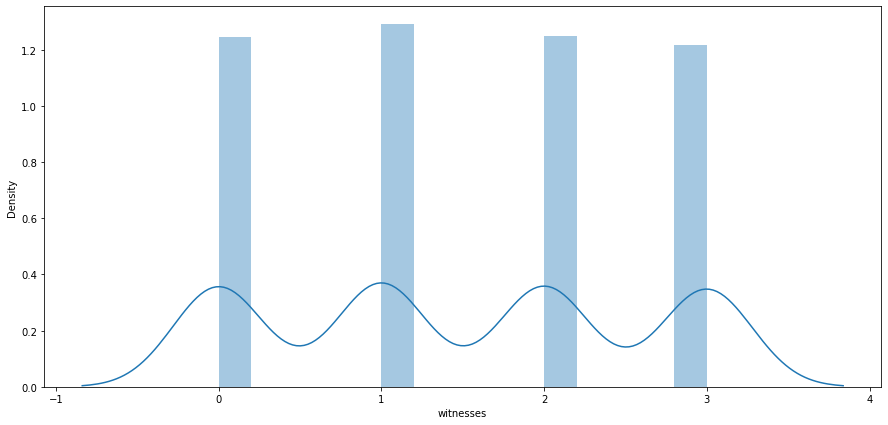

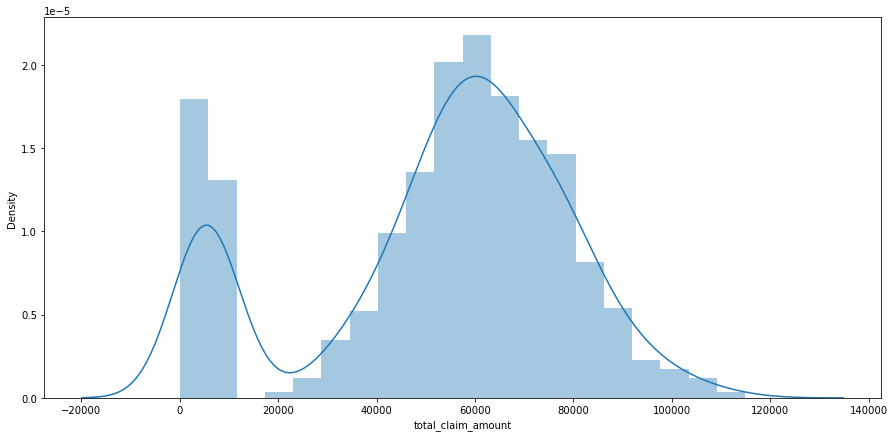

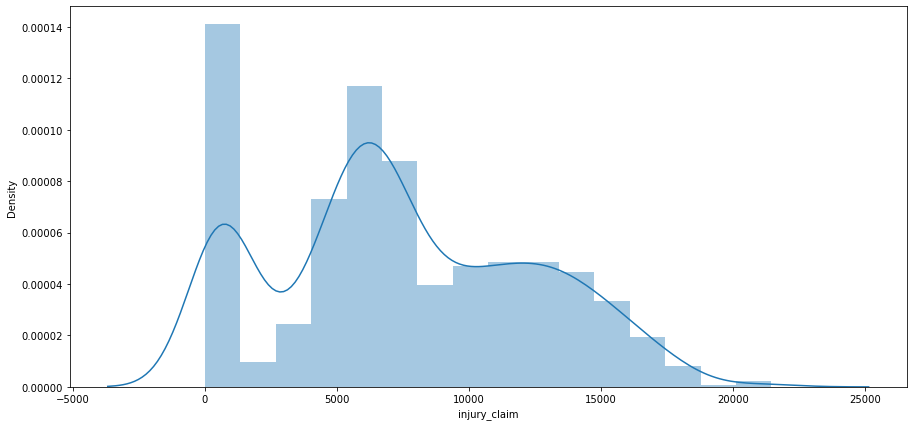

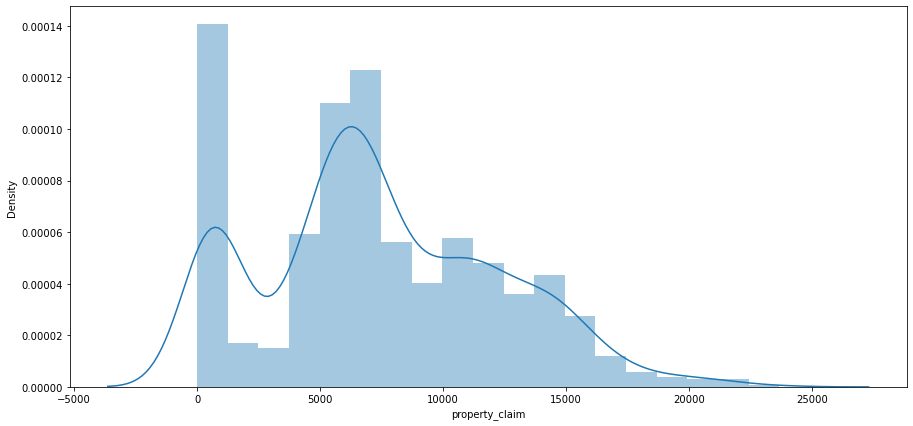

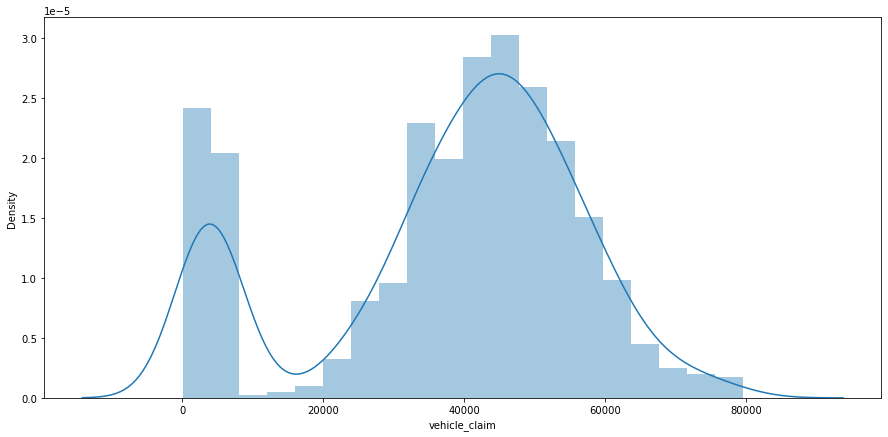

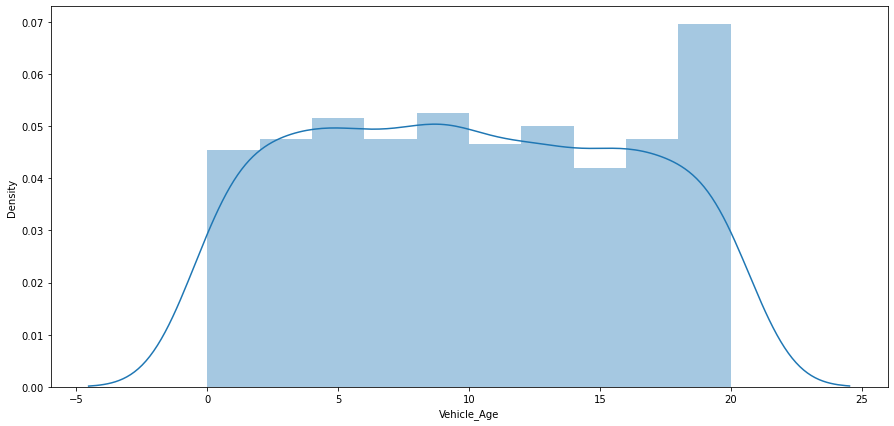

In [76]:
for i in cont:
    sns.distplot(X[i])
    plt.show()

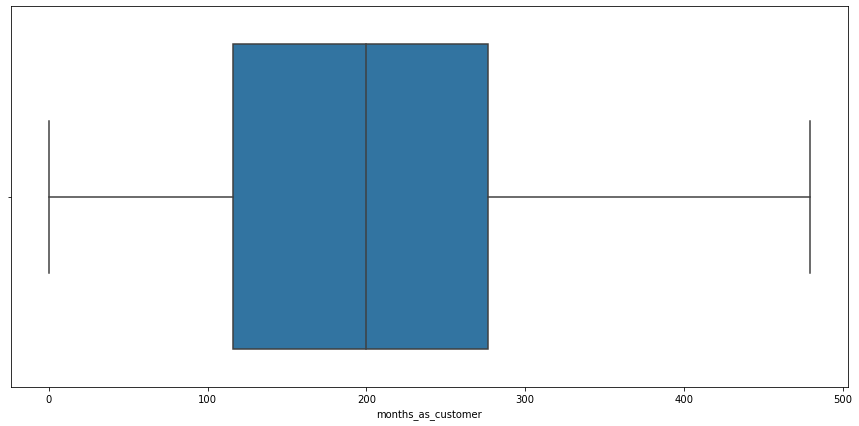

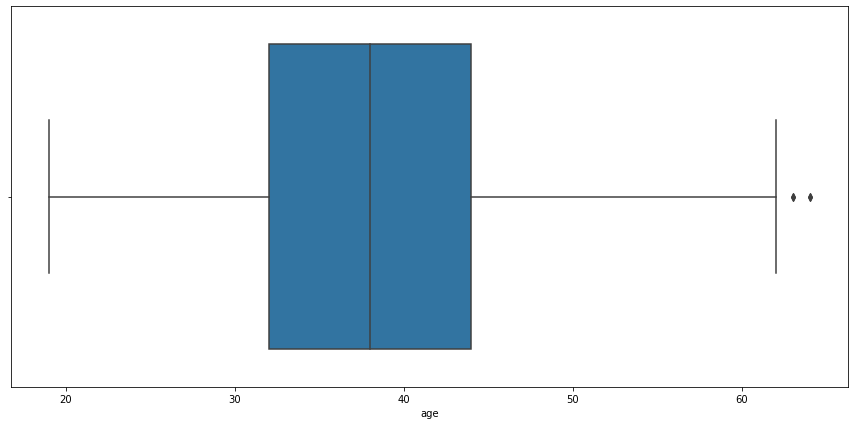

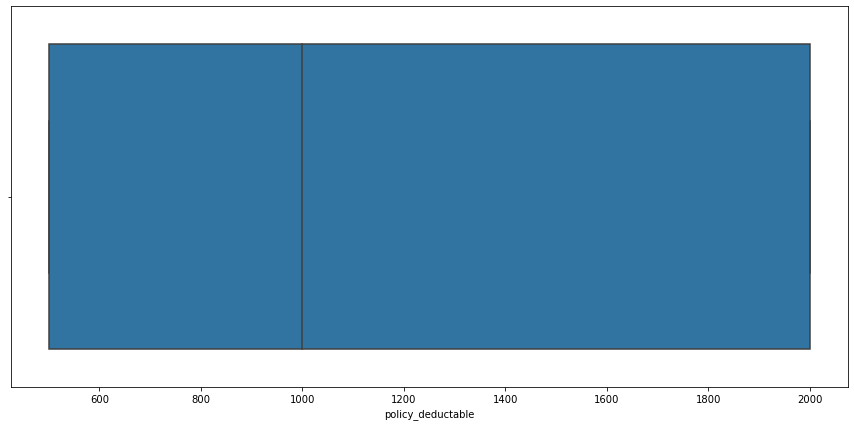

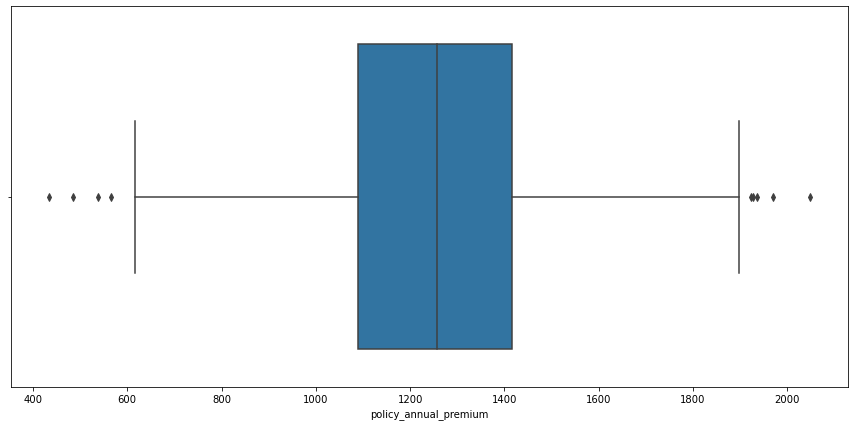

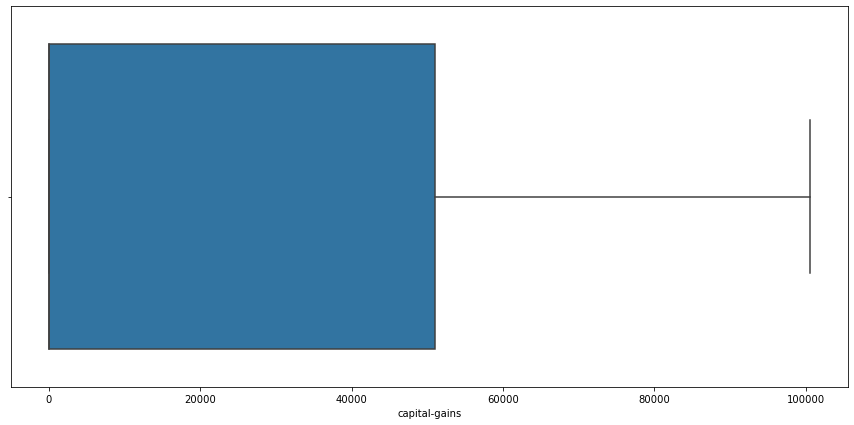

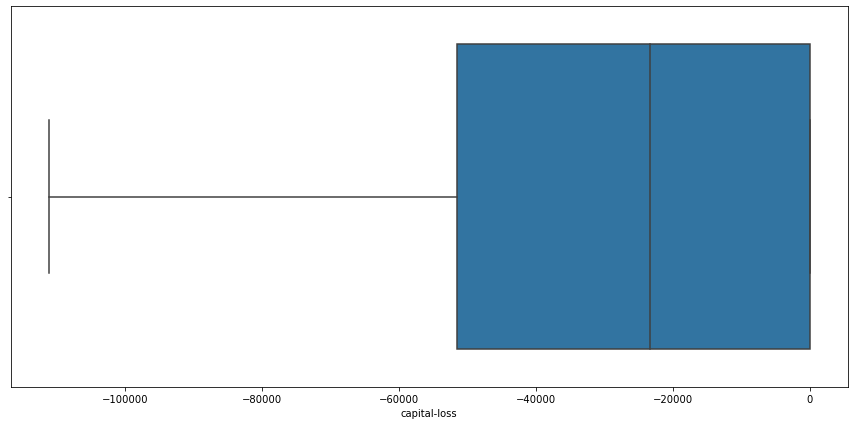

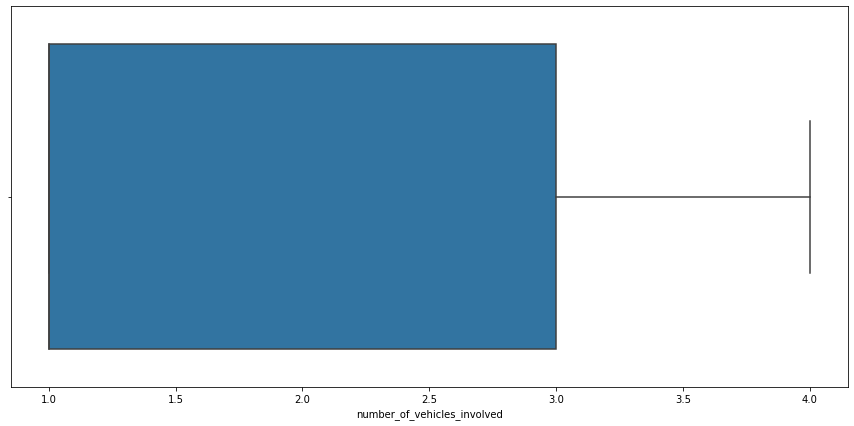

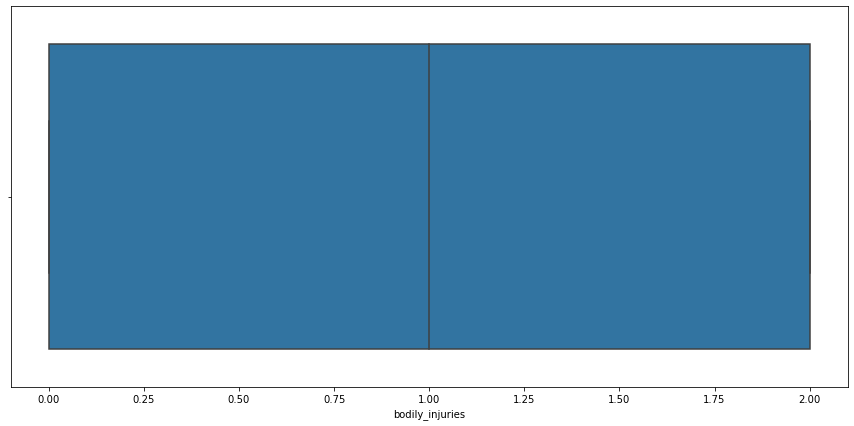

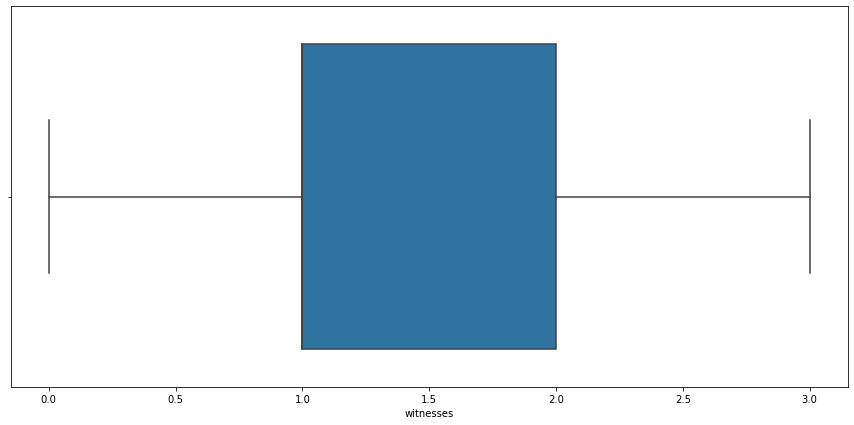

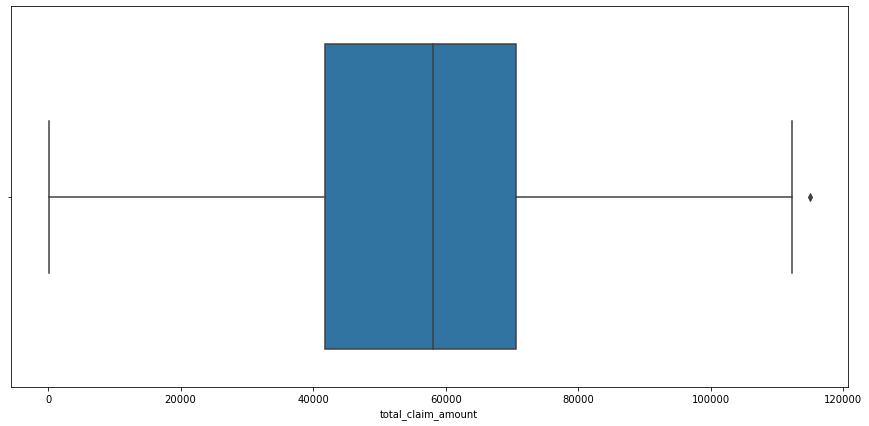

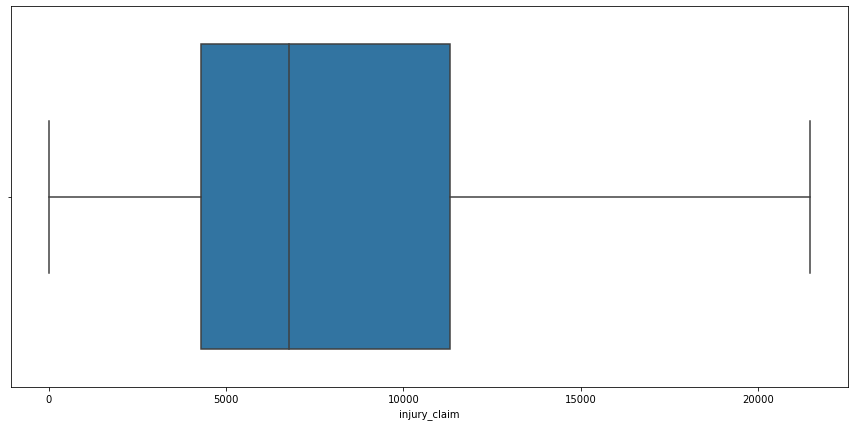

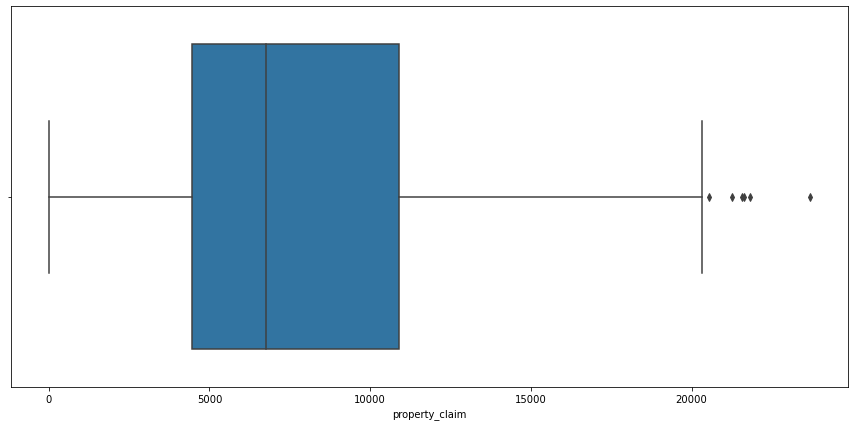

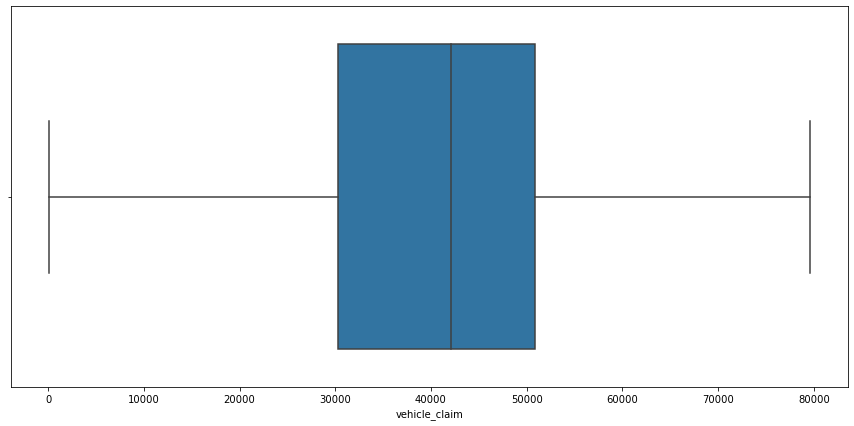

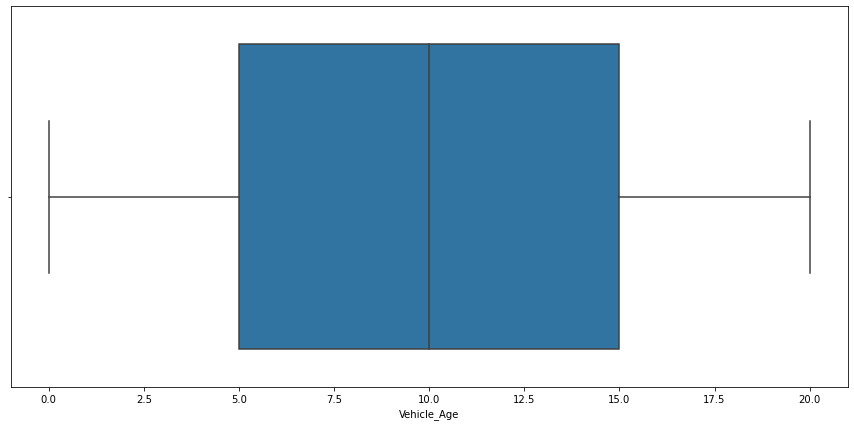

In [77]:
for i in cont:
    sns.boxplot(X[i])
    plt.show()

Unbalanced data distribution is followed with the continous variables. Plus outliers do exsist as well. 

In [79]:
### Checking the skewness in the continous variables. 
X[cont].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Vehicle_Age                    0.048289
dtype: float64

In [80]:
column=['age','policy_annual_premium','total_claim_amount','property_claim']
for i in column:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    lower=X[i].quantile(.25) - (1.5 * IQR)
    upper=X[i].quantile(.75) + (1.5 * IQR)
    X[i]=np.where(X[i]<lower,lower,X[i])
    X[i]=np.where(X[i]>upper,upper,X[i])

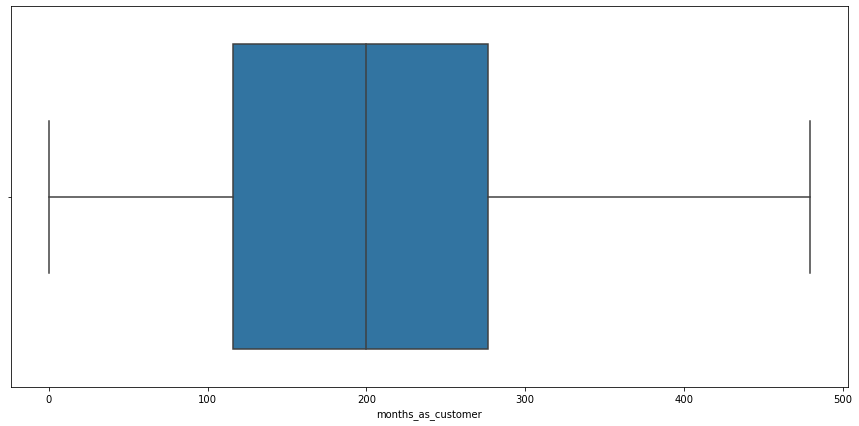

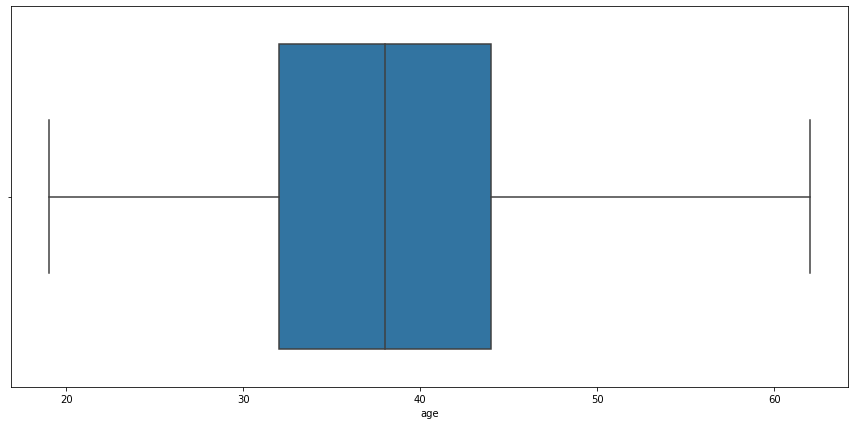

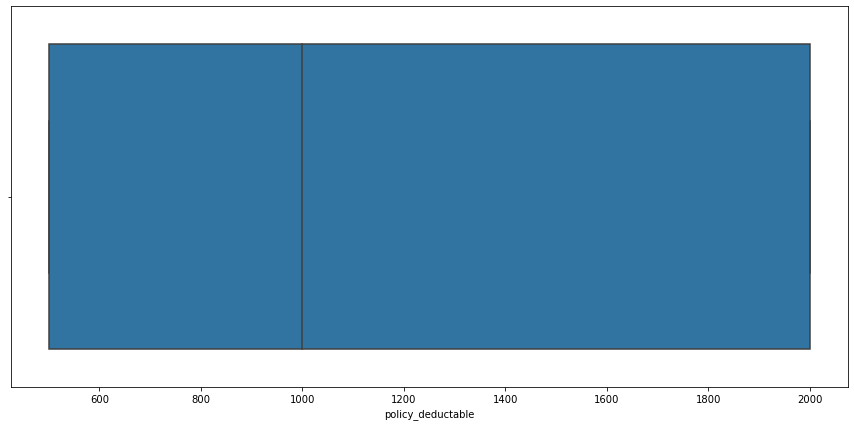

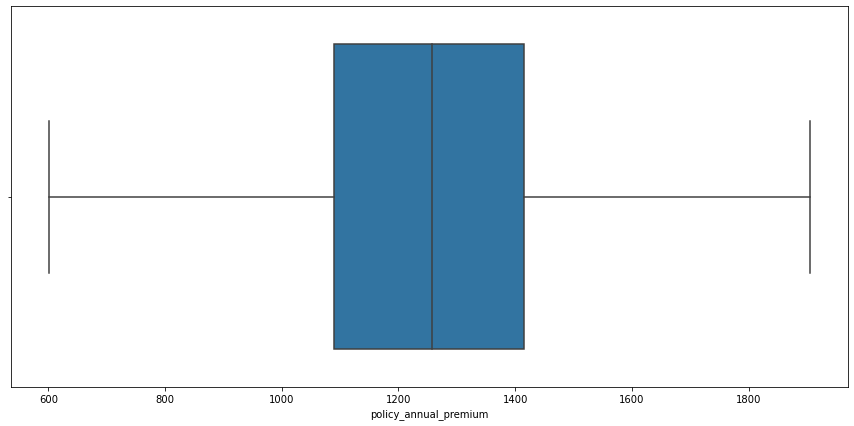

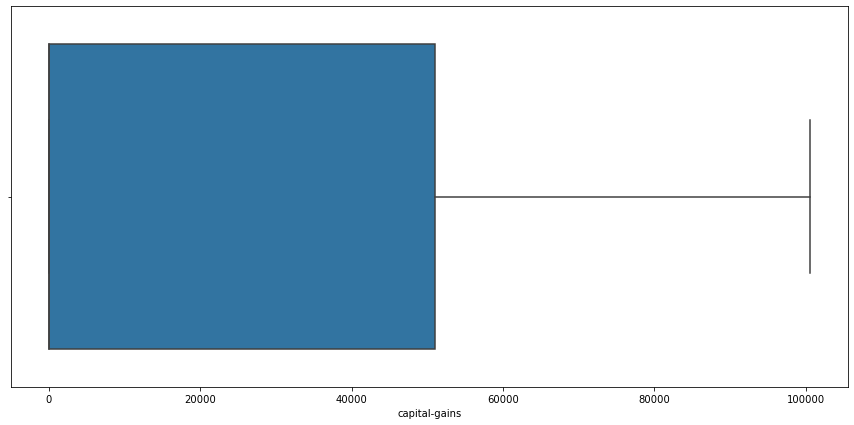

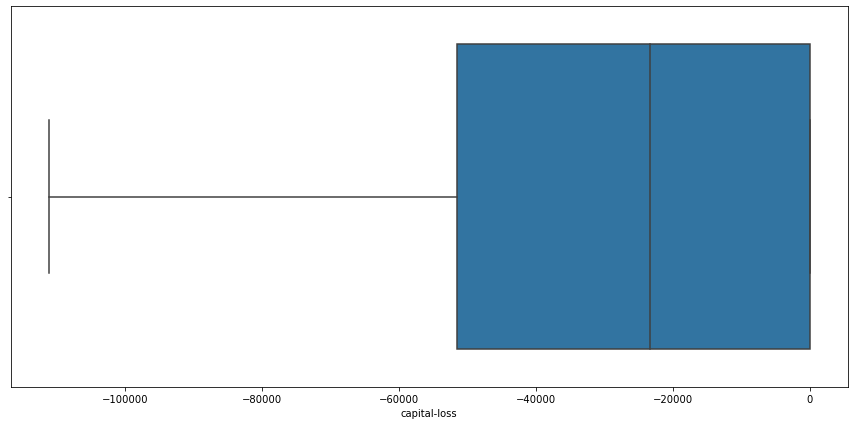

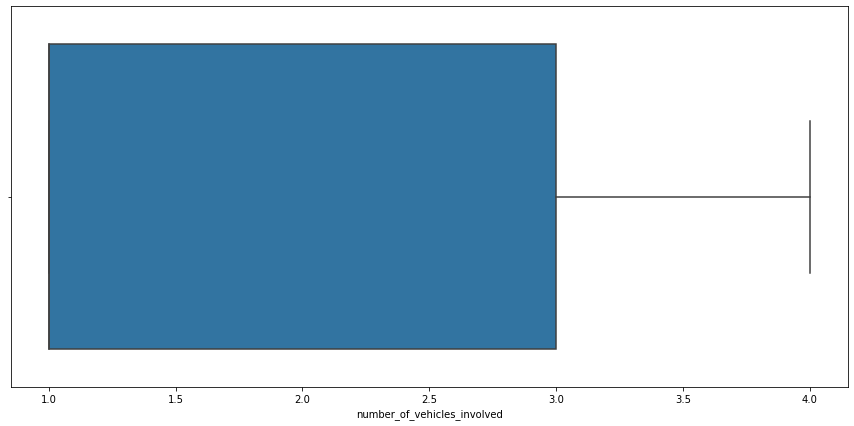

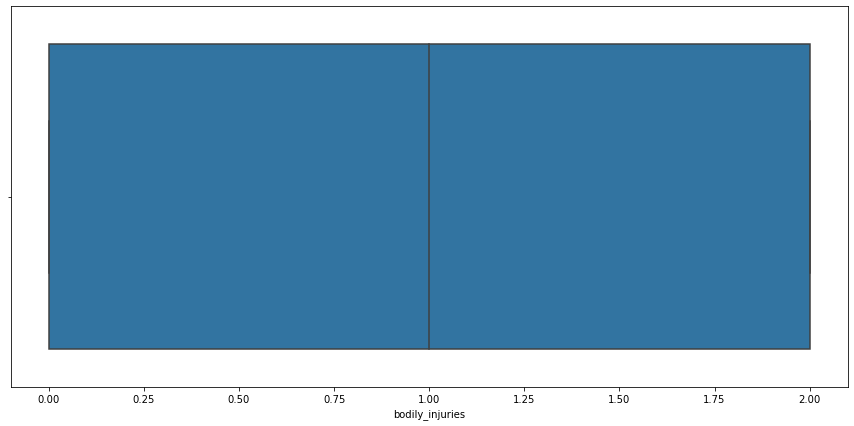

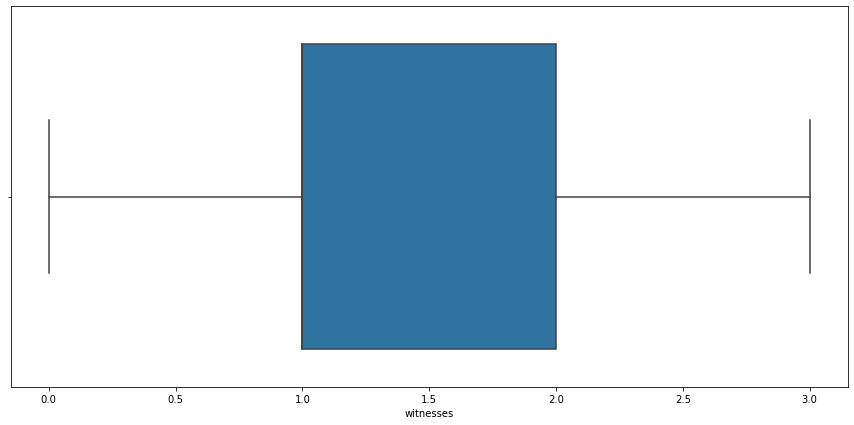

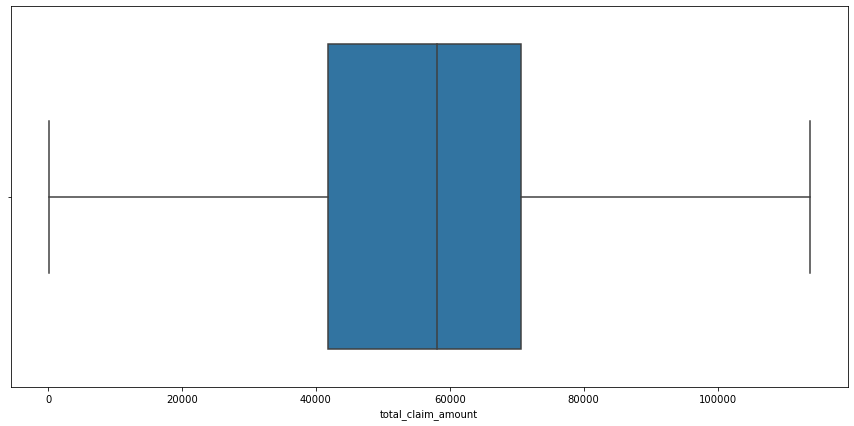

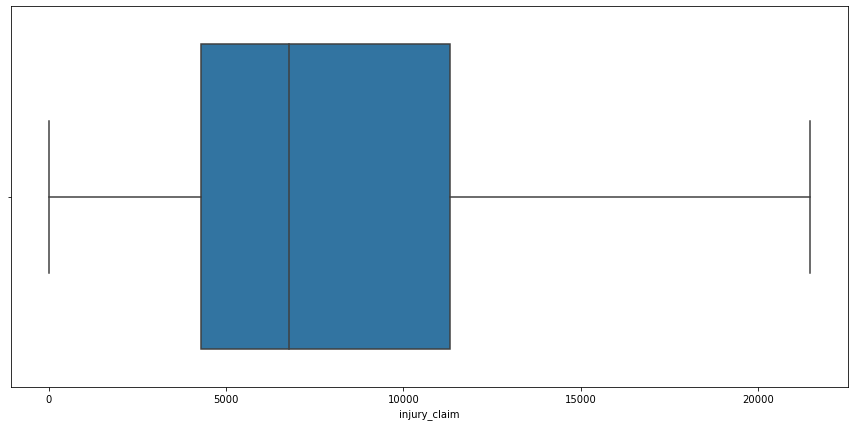

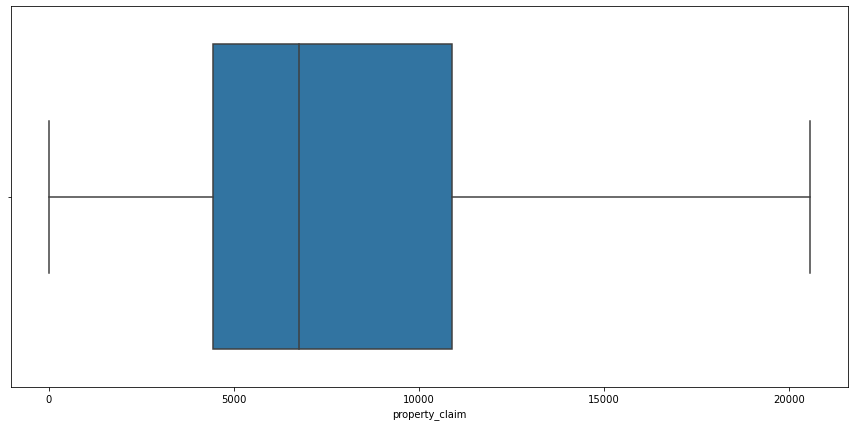

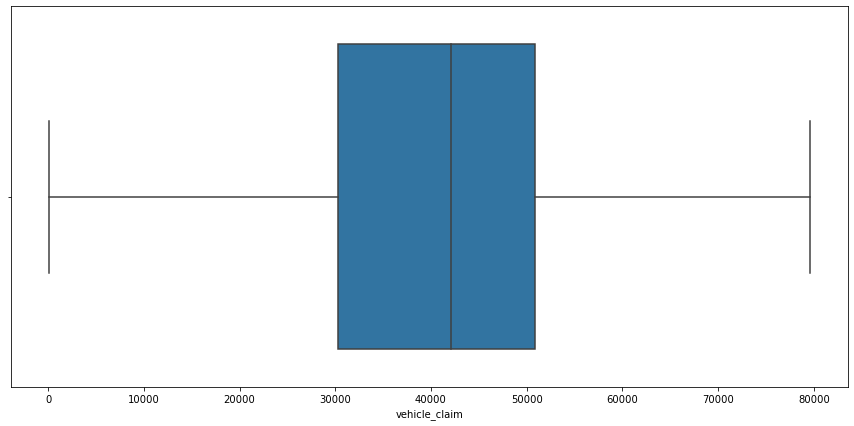

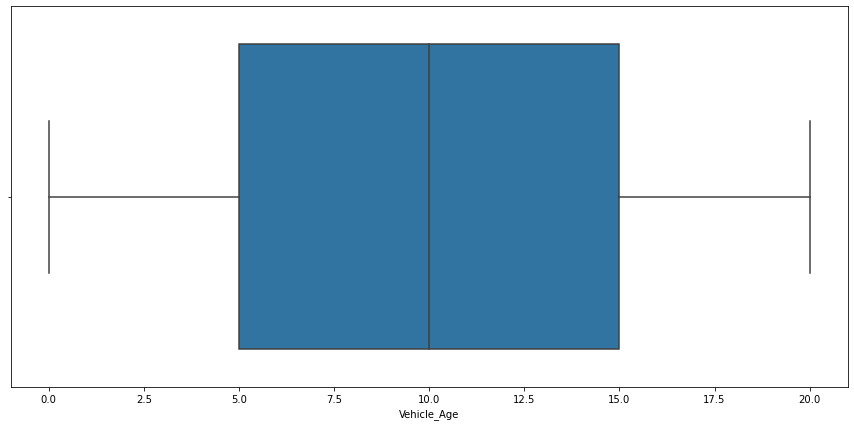

In [82]:
for i in cont:
    sns.boxplot(X[i])
    plt.show()

# Checking the multicolllinerity: 

In [83]:
sc= StandardScaler()
scale= sc.fit_transform(X[cont])

In [84]:
VIF= pd.DataFrame()
VIF['features']=X[cont].columns

In [87]:
VIF['vif']= [variance_inflation_factor(scale,i) for i in range(len(cont))]
VIF

features           vif
0            months_as_customer      6.815060
1                           age      6.788114
2             policy_deductable      1.020949
3         policy_annual_premium      1.013444
4                 capital-gains      1.014914
5                  capital-loss      1.012754
6   number_of_vehicles_involved      1.095850
7               bodily_injuries      1.011043
8                     witnesses      1.023162
9            total_claim_amount  47858.381223
10                 injury_claim   1632.697036
11               property_claim   1607.393224
12                vehicle_claim  24471.259850
13                  Vehicle_Age      1.015279

In [88]:
X.drop('total_claim_amount',axis=1,inplace=True)
catg=[col for col in X.columns if X[col].dtypes=='object']
cont=[col for col in X.columns if X[col].dtypes!='object']

In [90]:
sc= StandardScaler()
scale= sc.fit_transform(X[cont])
VIF= pd.DataFrame()
VIF['features']=X[cont].columns
VIF['vif']= [variance_inflation_factor(scale,i) for i in range(len(cont))]
VIF

features       vif
0            months_as_customer  6.772147
1                           age  6.774011
2             policy_deductable  1.019308
3         policy_annual_premium  1.010403
4                 capital-gains  1.013336
5                  capital-loss  1.012154
6   number_of_vehicles_involved  1.092676
7               bodily_injuries  1.008444
8                     witnesses  1.023126
9                  injury_claim  2.128118
10               property_claim  2.242766
11                vehicle_claim  3.214606
12                  Vehicle_Age  1.013401

In [91]:
X[cont].skew()

months_as_customer             0.362177
age                            0.469878
policy_deductable              0.477887
policy_annual_premium          0.016003
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.348531
vehicle_claim                 -0.621098
Vehicle_Age                    0.048289
dtype: float64

<AxesSubplot:ylabel='Density'>

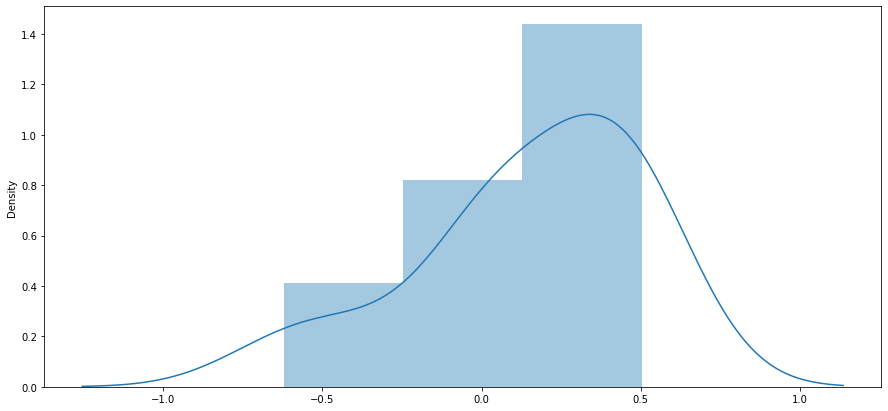

In [92]:
plt.figure(figsize=[15,7])
sns.distplot(X[cont].skew())

# Performing the transformation and standarization: 

In [93]:
for i in cont:
    po=power_transform(X[cont])
    X[i]=sc.fit_transform(po)

# Encoding the categorical variables: 

In [94]:
ord=['umbrella_limit','insured_education_level','insured_occupation']
for i in ord:
    X[i]=le.fit_transform(X[i])

In [95]:
### The rest of the categorical variables are nominal in nature. 
X=pd.get_dummies(X,drop_first=True)

In [96]:
print(X.shape  , Y.shape)

(1000, 124) (1000,)


# Balancing the dataset now: 

In [97]:
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [98]:
print(x.shape , y.shape)

(1506, 124) (1506,)


In [99]:
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: Target, dtype: float64

# Applying machine learning classification techniques now: 

In [100]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=8,test_size=.3)

In [101]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [102]:
accuracy=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )

Confusion Matrix of  LogisticRegression()  is 
 [[234  15]
 [ 20 183]]
Confusion Matrix of  RidgeClassifier()  is 
 [[231  18]
 [ 18 185]]
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[217  32]
 [ 29 174]]
Confusion Matrix of  SVC()  is 
 [[237  12]
 [ 37 166]]
Confusion Matrix of  KNeighborsClassifier()  is 
 [[ 21 228]
 [  6 197]]
Confusion Matrix of  RandomForestClassifier()  is 
 [[233  16]
 [ 25 178]]
Confusion Matrix of  SGDClassifier()  is 
 [[225  24]
 [ 17 186]]
Confusion Matrix of  BaggingClassifier()  is 
 [[229  20]
 [ 20 183]]
Confusion Matrix of  AdaBoostClassifier()  is 
 [[231  18]
 [ 22 181]]
Confusion Matrix of  GradientBoostingClassifier()  is 
 [[228  21]
 [ 18 185]]


In [103]:
pd.DataFrame({'Model':model,'Accuracy':accuracy})

Model  Accuracy
0                               LogisticRegression()     92.26
1                                  RidgeClassifier()     92.04
2                           DecisionTreeClassifier()     86.50
3                                              SVC()     89.16
4                             KNeighborsClassifier()     48.23
5  (DecisionTreeClassifier(max_features='sqrt', r...     90.93
6                                    SGDClassifier()     90.93
7  (DecisionTreeClassifier(random_state=134628861...     91.15
8  (DecisionTreeClassifier(max_depth=1, random_st...     91.15
9  ([DecisionTreeRegressor(criterion='friedman_ms...     91.37

Logitic Regression is giving us high accuracy score. 

# Performing the cross validation score: 

In [106]:
ac=[]
cros=[]
dif=[]
for i in model:
    ac.append(accuracy_score(y_test,i.predict(x_test))*100)
    cros.append(cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    dif.append((accuracy_score(y_test,i.predict(x_test))*100)- (cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100))
    
pd.DataFrame({'Model':model,'Accuracy':ac,'Cross Validation':cros,'Difference':dif})

Model   Accuracy  \
0                               LogisticRegression()  92.256637   
1                                  RidgeClassifier()  92.035398   
2                           DecisionTreeClassifier()  86.504425   
3                                              SVC()  89.159292   
4                             KNeighborsClassifier()  48.230088   
5  (DecisionTreeClassifier(max_features='sqrt', r...  90.929204   
6                                    SGDClassifier()  90.929204   
7  (DecisionTreeClassifier(random_state=134628861...  91.150442   
8  (DecisionTreeClassifier(max_depth=1, random_st...  91.150442   
9  ([DecisionTreeRegressor(criterion='friedman_ms...  91.371681   

   Cross Validation  Difference  
0         85.670282    6.586355  
1         84.344459    7.690939  
2         83.472751    2.964129  
3         83.351961    5.807331  
4         55.512750   -7.282661  
5         86.265869    5.590487  
6         85.668742    6.256919  
7         86.527909    4.026727  
8         84.742030    6.408413  
9         86.129238    5.242223

In [108]:
acc=[]
cros=[]

for m in model:
    m.fit(x_train,y_train)
    pred= m.predict(x_test)
    cros.append(cross_val_score(i,x,y,cv=5).mean()*100)
    
pd.DataFrame({'Model':model,'Cross Validation':cros})

Model  Cross Validation
0                               LogisticRegression()         86.063453
1                                  RidgeClassifier()         85.864337
2                           DecisionTreeClassifier()         86.195903
3                                              SVC()         85.997008
4                             KNeighborsClassifier()         85.997008
5  (DecisionTreeClassifier(max_features='sqrt', r...         86.063013
6                                    SGDClassifier()         85.930343
7  (DecisionTreeClassifier(random_state=202298776...         85.864117
8  (DecisionTreeClassifier(max_depth=1, random_st...         86.063453
9  ([DecisionTreeRegressor(criterion='friedman_ms...         85.930563

# Performing hypertuning variables: 

In [110]:
from sklearn.model_selection import GridSearchCV
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }

GCV= GridSearchCV(GB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [5, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [111]:
GCV.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, max_depth=8, n_estimators=200)

In [112]:
pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,pred)

0.911504424778761

# Confusion matrix and AUC ROC Curve: 

<AxesSubplot:>

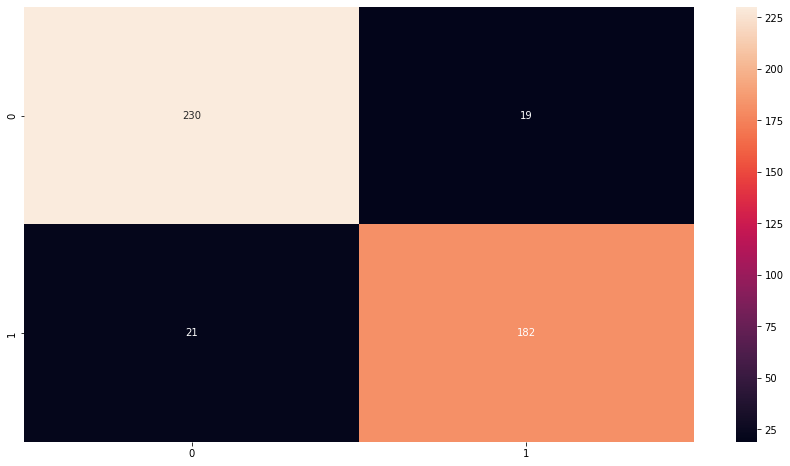

In [113]:
plt.figure(figsize=[15,8])
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

Text(0.5, 1.0, 'ROC AUC Plot')

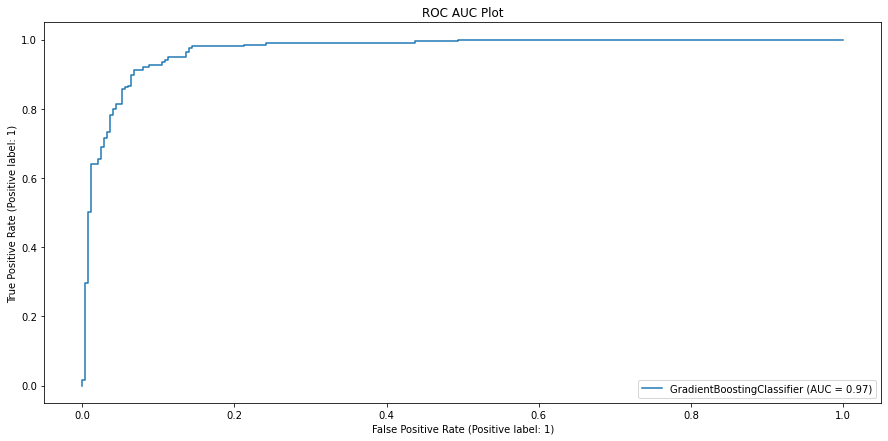

In [114]:
plot_roc_curve(GB_model,x_test,y_test)
plt.title('ROC AUC Plot')

### The final AUC score we got is 98%. Hence model is a great fit for the distribution.

# Saving the model now: 

In [115]:
import joblib
joblib.dump(GB_model,"Insurance-fraud.pkl")

['Insurance-fraud.pkl']